## **SPOTIFY HIT PREDICTOR: Analyzing Song Popularity**

**Project 11: Rocknomics**

Group 4:
- Hanna Luise Baeuchle (53279)
- David Graça Martinis (26133)
- Niklas Mundt (53766)
- Monica Schirripa (55701)
- Laura Weil (53012)

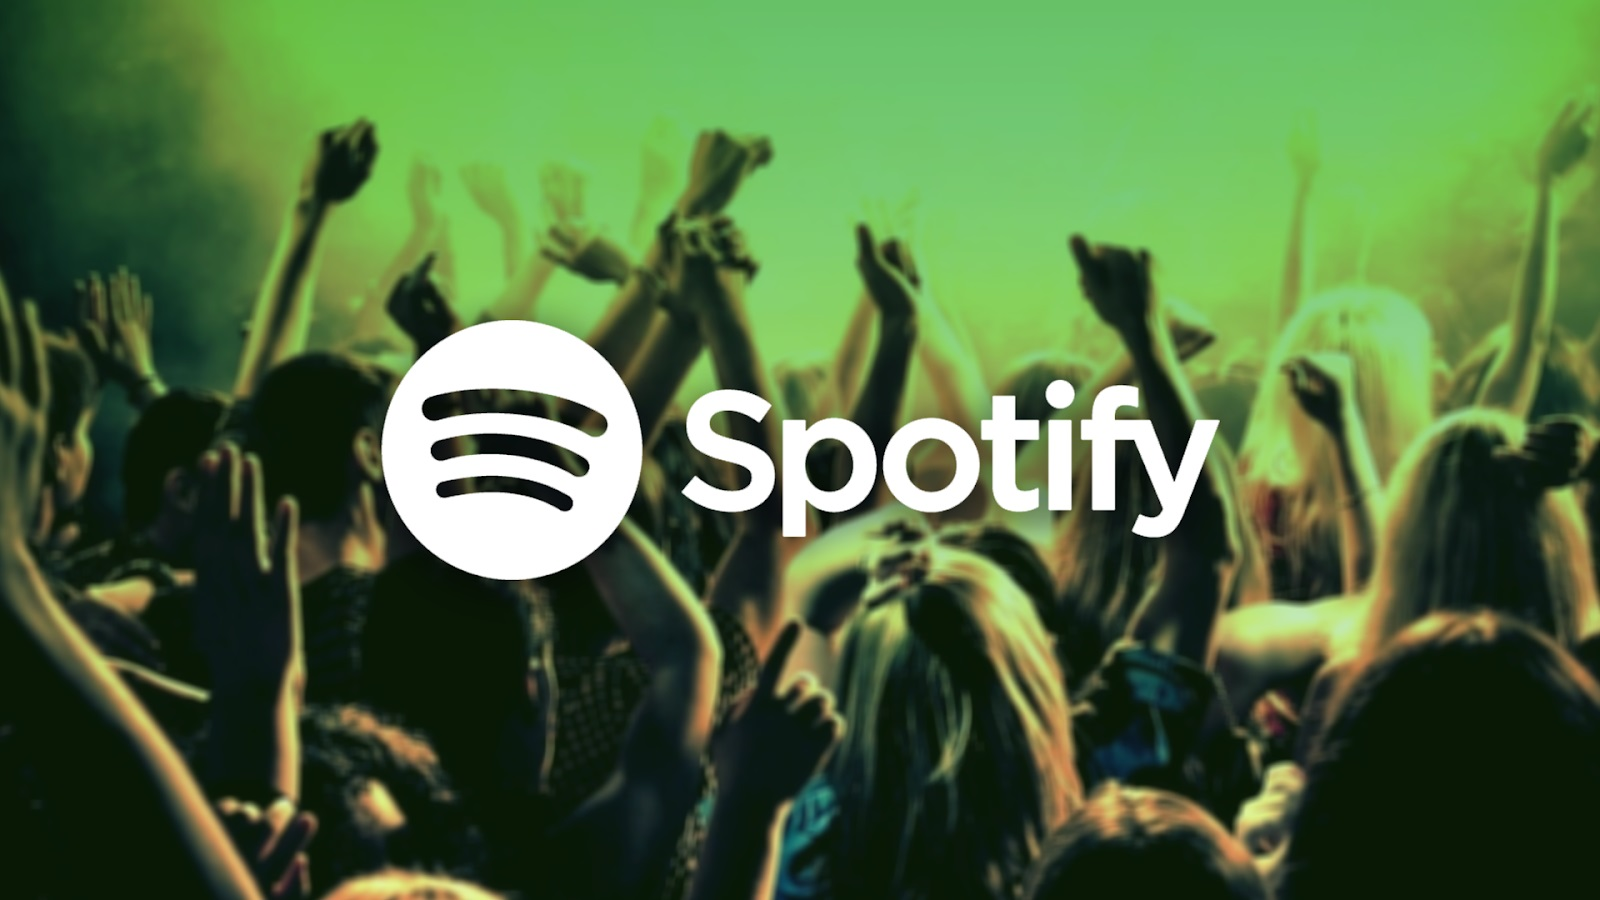

## INTRODUCTION

**BUSINESS CONTEXT**

The music industry has experienced a remarkable metamorphosis in recent years, propelled primarily by the rise of digital streaming platforms such as **Spotify**, Apple Music, and Amazon Music. These platforms have revolutionized the way artists approach music creation, while generating an immense volume of data related to song attributes, album characteristics, and track features. 
Harnessing this data for actionable insights has become crucial for various stakeholders in the music industry, including artists, record labels, and music recommendation services, as they strive to adapt to the rapidly evolving landscape and address the diverse preferences of listeners.

Given the highly competitive nature of the music market, artists and record labels face constant challenges in capturing the attention of listeners and achieving commercial success. As traditional promotion methods like radio play and physical album sales decline, the importance of understanding and adapting to the dynamics of digital streaming platforms has become paramount. The increasing prominence of data-driven decision making in the music industry calls for effective approaches to analyzing the wealth of available data in order to stay relevant and succeed in this new environment.

---------------------------------------------------------

**MAIN OBJECTIVE**

In this project, our primary objective is to explore and analyze a large dataset of songs collected from the Spotify Web API, encompassing the period between 1921 and 2020. By employing machine learning techniques, we aim to develop a **predictive model** capable of identifying songs that are likely to become popular and understanding the key factors that contribute to their success. Such a model can potentially be used by artists, producers, and record labels to better tailor their work to the tastes and preferences of their target audience, ultimately increasing the chances of a song's success in the highly competitive music market.

The importance of this project lies in its potential to provide a deeper understanding of the factors that contribute to a song or artist's success, as well as to offer valuable insights into the ever-changing landscape of the music industry. Moreover, the findings of this project can serve as a basis for further research and development in the realm of music analytics, paving the way for more advanced and personalized music experiences for users across the globe.

The dataset includes more than 175,000 songs, and contains information about song attributes, album characteristics, and track features, as well as metadata such as the artist's name and the year of release. We will preprocess and clean the dataset, perform feature engineering to extract meaningful information from the input features, and develop a machine learning model that can accurately predict a song's popularity.

To achieve this goal, we will evaluate and compare different machine learning algorithms and techniques, such as regression models, tree-based models, and neural networks, and tune the model using techniques such as cross-validation and hyperparameter optimization. We will also explore the key factors that contribute to a song's popularity, using feature importance analysis and visualization techniques to gain insights into the relationships between different input features and the output variable.To achieve this goal, we will evaluate and compare different machine learning algorithms and techniques, such as regression models, tree-based models, and neural networks, and tune the model using techniques such as cross-validation and hyperparameter optimization. We will also explore the key factors that contribute to a song's popularity, using feature importance analysis and visualization techniques to gain insights into the relationships between different input features and the output variable.

This Machine Learning project can help to:
 - Develop predictive models that analyze the characteristics of popular songs and use them to predict the success of new or upcoming songs.
 - Identify the most important factors that contribute to the success of a song, such as its duration, and use this information to guide the creation of new music.
 - Personalize music recommendations for individual listeners based on their listening history, preferences, and behaviors, thereby increasing the chances that they will discover and enjoy new songs.
    

<div class="alert alert-danger" role="alert">
Need to add the metric we will optimize and why

## Strategy

- Exploratory Data Analysis
- Dimensionality Reduction
- Preprocessing Pipline
- Models:
    1. Linear Regression
    2. Regression Tree


In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
import pypopulation

## EDA - ALBUMS

**Data Dictionary**

The following data dictionary provides an overview of the variables found in the Spotify album dataset. This dataset contains information about various albums, their associated artists, and additional details that can help us analyze trends and patterns in the music industry.

* **album_type** : The type of the album (e.g., 'single', 'album', 'compilation').

* **artist_id** : A unique identifier for the artist associated with the album.

* **available_markets** : A list of market codes (country codes) where the album is available for streaming or purchase.

* **eternal_urls** : A link to the Spotify Web API endpoint containing full details about the album.

* **href** : A link to the Spotify Web API endpoint containing full details about the album.

* **id** : A unique identifier for the album.

* **images** : A list of dictionaries containing URLs to album cover images, along with image dimensions (width and height).

* **name** : The name of the album.

* **release_date** : The release date of the album, usually in the format 'YYYY-MM-DD'.

* **release_date_precision** : The precision level of the release date (e.g., 'year', 'month', 'day'), indicating the accuracy of the provided release date.

* **total_tracks** : The total number of tracks in the album.

* **track_id** : A unique identifier for the track associated with the album.

* **track_name_prev** : The name of the previous track in the album or the previous version of the track (depending on the context in your dataset).

* **uri** : A link to the Spotify Web API endpoint containing full details about the album.

* **type** : The object type, which should be 'album' for this dataset, indicating that the data entry is related to an album.

In [2]:
albums = pd.read_csv('SpotGenTrack/Data Sources/spotify_albums.csv', index_col = 0, converters={"available_markets": literal_eval})

In [3]:
albums

,album_type,artist_id,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,track_id,track_name_prev,uri,type
0,single,3DiDSECUqqY1AuBP8qtaIa,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,1gAM7M4rBwEbSPeAQR2nx1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",If I Ain't Got You EP,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,track_32,spotify:album:1gAM7M4rBwEbSPeAQR2nx1,album
1,album,6s1pCNXcbdtQJlsnM1hRIA,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,track_11,spotify:album:4KfJZV7WfolYlxBzOTo66s,album
2,single,5YjfNaHq05WrwldRe1QSBc,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/7n...,https://api.spotify.com/v1/albums/7nLYY7uAVUb5...,7nLYY7uAVUb57kpd7tZxnS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Take My Bass,2019-03-14,day,1,3jJKj4QTK3v18ZSwpk7AcV,track_15,spotify:album:7nLYY7uAVUb57kpd7tZxnS,album
3,single,2G9Vc16JCpnZmK4uGH46Fa,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/6p...,https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...,6p20Rt4x2Qn5mUMRi1s6pj,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Hypnotizing (Are U),2016-11-16,day,1,1xGtDafUZbHyYC3Xarcbrj,track_46,spotify:album:6p20Rt4x2Qn5mUMRi1s6pj,album
4,single,2dwM9OcE4c3Ph1UBINSodx,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/1X...,https://api.spotify.com/v1/albums/1XeoOqC1q7U2...,1XeoOqC1q7U2iyLEQJ64cu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sunshine,2018-07-20,day,1,0gWtsXvXOzAT6FtM3ur8in,track_10,spotify:album:1XeoOqC1q7U2iyLEQJ64cu,album
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75506,album,0S7CCsKpXJ8e1dIstizHw5,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/4Z...,https://api.spotify.com/v1/albums/4ZbkQn6amf1t...,4ZbkQn6amf1t3a202zen2u,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Latino For Life,2014-01-24,day,13,3CZY7jD1Zf30zIdbwS5212,track_17,spotify:album:4ZbkQn6amf1t3a202zen2u,album
75507,album,73Vk4dL8kYkbRJxWJDq1wL,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/4D...,https://api.spotify.com/v1/albums/4DifRQy4Dyey...,4DifRQy4Dyey9NSS7ywnEx,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Dime Qué Pasa,2011-03-31,day,11,7GOBsKucPG5Bh8qzStmrQ6,track_18,spotify:album:4DifRQy4Dyey9NSS7ywnEx,album
75508,album,3yW6jTzGjHUUkLvLkjLOVn,"[AU, NZ]",{'spotify': 'https://open.spotify.com/album/4P...,https://api.spotify.com/v1/albums/4PXy3cBCNeY0...,4PXy3cBCNeY0ZVKTOGi9Cw,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Black Fingernails, Red Wine",2006-06-10,day,13,0ujklxrVM2jwpLMgbTwTd1,track_7,spotify:album:4PXy3cBCNeY0ZVKTOGi9Cw,album
75509,album,4iudEcmuPlYNdbP3e1bdn1,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/51...,https://api.spotify.com/v1/albums/511p6iaCuK8S...,511p6iaCuK8Sr0BYdpcfkq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Freak Show,1997,year,13,58nHFSWj5N5JxNtWgS85TL,track_14,spotify:album:511p6iaCuK8Sr0BYdpcfkq,album


In [4]:
albums.dtypes

album_type                object
artist_id                 object
available_markets         object
external_urls             object
href                      object
id                        object
images                    object
name                      object
release_date              object
release_date_precision    object
total_tracks               int64
track_id                  object
track_name_prev           object
uri                       object
type                      object
dtype: object

In [5]:
albums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75511 entries, 0 to 75510
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   album_type              75511 non-null  object
 1   artist_id               75511 non-null  object
 2   available_markets       75511 non-null  object
 3   external_urls           75511 non-null  object
 4   href                    75511 non-null  object
 5   id                      75511 non-null  object
 6   images                  75511 non-null  object
 7   name                    75511 non-null  object
 8   release_date            75511 non-null  object
 9   release_date_precision  75511 non-null  object
 10  total_tracks            75511 non-null  int64 
 11  track_id                75511 non-null  object
 12  track_name_prev         75511 non-null  object
 13  uri                     75511 non-null  object
 14  type                    75511 non-null  object
dtypes:

In [6]:
albums.describe()

,total_tracks
count,75511.000000
mean,8.235807
std,11.669811
min,1.000000
25%,1.000000
50%,5.000000
75%,12.000000
max,977.000000


In [7]:
#check for missing values
albums.isnull().sum()

album_type                0
artist_id                 0
available_markets         0
external_urls             0
href                      0
id                        0
images                    0
name                      0
release_date              0
release_date_precision    0
total_tracks              0
track_id                  0
track_name_prev           0
uri                       0
type                      0
dtype: int64

In [8]:
#check for duplicated rows
albums.loc[:, albums.columns != "available_markets"].duplicated().unique()
#avalaible markets excluded as it is a list.

array([False])

In [9]:
#datetime
albums['release_date']= pd.to_datetime(albums['release_date'])

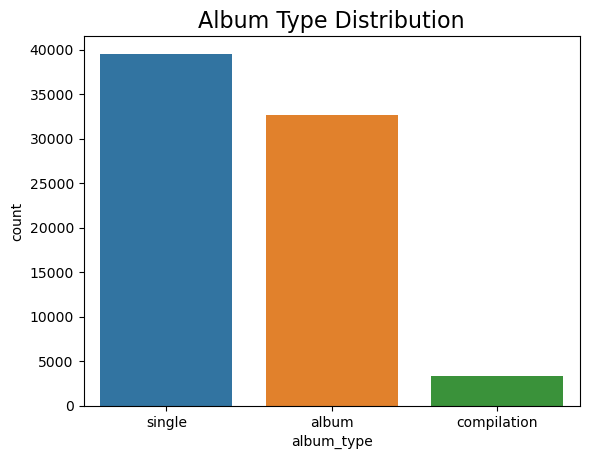

In [10]:
#album type distribution
sns.countplot(x='album_type', data=albums)
plt.title('Album Type Distribution', fontsize=16)
plt.show()

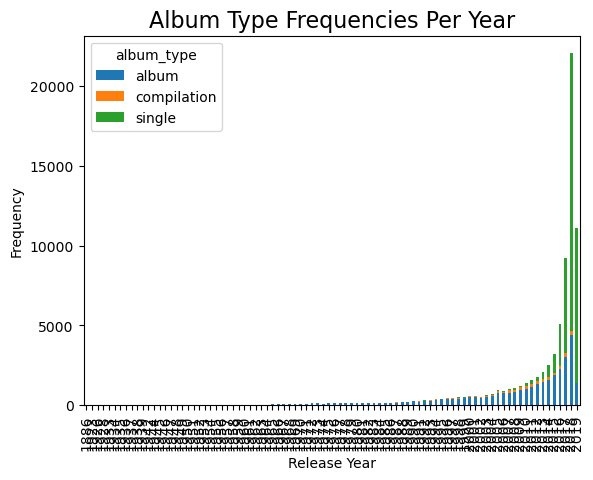

In [11]:
#album type distribution per year

# Convert 'release_date' to datetime and extract the year
albums['release_year'] = pd.to_datetime(albums['release_date']).dt.year

# Calculate album type frequencies per year
yearly_album_type_counts = albums.groupby(['release_year', 'album_type']).size().reset_index(name='count')

# Pivot the yearly_album_type_counts dataframe to create a table suitable for plotting
yearly_album_type_pivot = yearly_album_type_counts.pivot_table(index='release_year', columns='album_type', values='count', fill_value=0)

# Plot the stacked bar plot using pandas plot function
yearly_album_type_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Album Type Frequencies Per Year', fontsize=16)
plt.show()

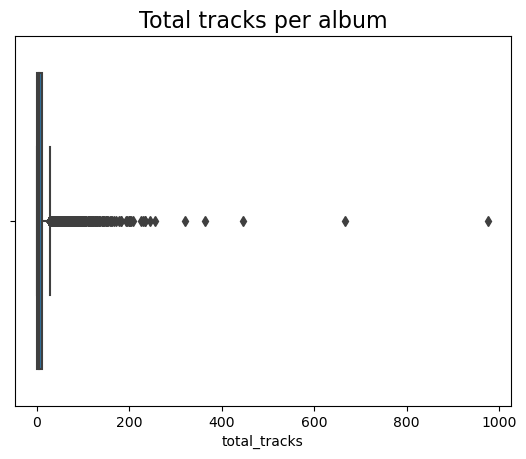

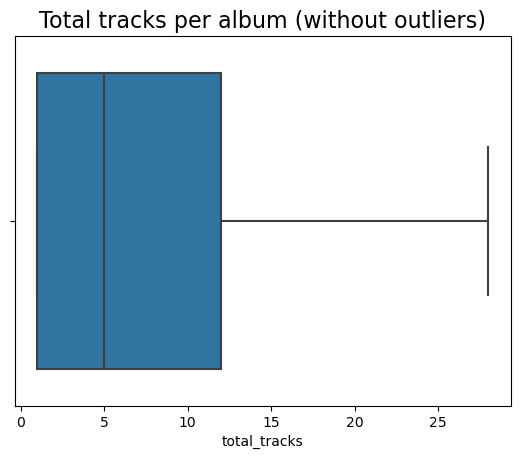

In [12]:
sns.boxplot(data=albums, x='total_tracks')
plt.title('Total tracks per album', fontsize=16)
plt.show()
sns.boxplot(data=albums, x='total_tracks', showfliers=False)
plt.title('Total tracks per album (without outliers)', fontsize=16)
plt.show()

## EDA - ARTISTS

**Data Dictionary**

The following data dictionary provides an overview of the variables found in the Spotify artist dataset. This dataset contains information about various artists, their popularity, followers, genres, and associated tracks,

* **artist_popularity** : the scale of popularity of the artist - [0 -100] where 100 is the most popular.

* **followers** : total amount of the artist's spotify followers

* **genres** : the name of the gender(s) associated with that artist

* **id** : unique identifier for each artist

* **name** : artist name

* **track_id** : unique identifier for the artist's track

* **track_name_prev** : The name of the previous track in the album or the previous version of the track (depending on the context in your dataset).

* **type** : "artist"

In [13]:
artists = pd.read_csv('SpotGenTrack/Data Sources/spotify_artists.csv', index_col = 0, converters={"genres": literal_eval})

In [14]:
artists.head()

,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type
0,44,23230,"[sertanejo, sertanejo pop, sertanejo tradicion...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC,track_9,artist
1,22,313,[],1dLnVku4VQUOLswwDFvRc9,The Grenadines,4wqwj0gA8qPZKLl5WVqXml,track_30,artist
2,26,1596,[danish pop rock],6YVY310fjfUzKi8hiqR7iK,Gangway,1bFqWDbvHmZe2f4Nf9qaD8,track_38,artist
3,31,149,[uk alternative pop],2VElyouiCfoYPDJluzwJwK,FADES,3MFSUBAidPzRBbIS7BDj1S,track_34,artist
4,21,11,[french baroque],4agVy03qW8juSysCTUOuDI,Jean-Pierre Guignon,2r3q57FhxdsCyYr0kuDq4b,track_26,artist


In [15]:
#check missing values
artists.isnull().sum()

artist_popularity    0
followers            0
genres               0
id                   0
name                 1
track_id             0
track_name_prev      0
type                 0
dtype: int64

In [16]:
#check duplicates
artists.drop(columns=["genres"]).duplicated().unique()

array([False])

In [17]:
#correlation
artists.corr()

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_14857/335023697.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  artists.corr()


,artist_popularity,followers
artist_popularity,1.000000,0.288724
followers,0.288724,1.000000


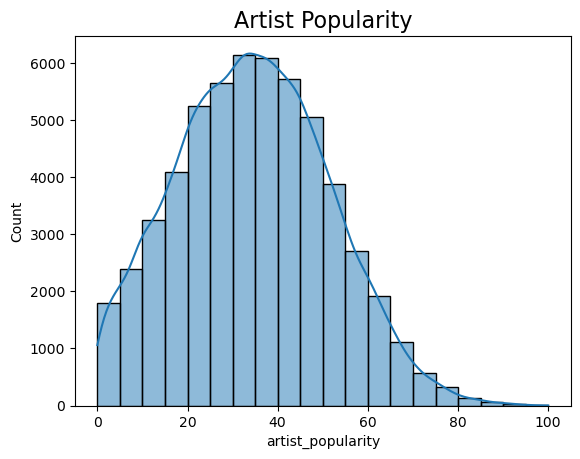

In [18]:
#exploring distribution of each numberical variable

#artist_popularity
sns.histplot(data=artists, x='artist_popularity', bins=20, kde=True)
plt.title('Artist Popularity', fontsize=16)
plt.show()

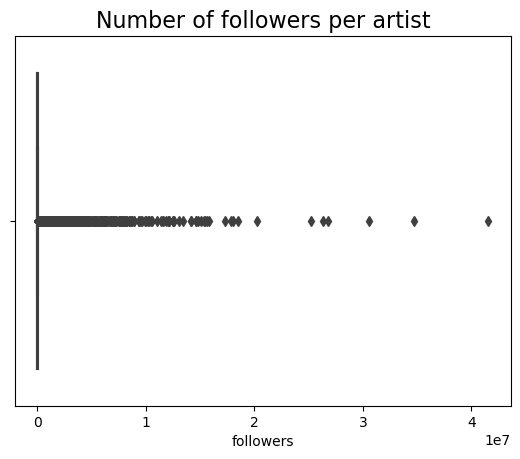

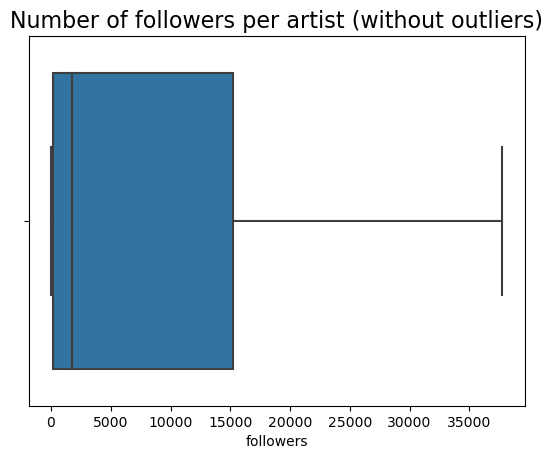

In [19]:
#followers
sns.boxplot(data=artists, x='followers')
plt.title('Number of followers per artist', fontsize=16)
plt.show()
sns.boxplot(data=artists, x='followers', showfliers=False)
plt.title('Number of followers per artist (without outliers)', fontsize=16)
plt.show()

## EDA - Tracks

**Data Dictionary**

The following data dictionary provides an overview of the variables found in the Spotify tracks dataset.

* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **album_id**: Album unique ID


* **artists_id**: Artist unique ID


* **country**: Origin Country

* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


* **duration_ms**: Duration of song in milliseconds

* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


* **id**: Track unique ID

* **instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

* **lyrics**: Track lyrics

* **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* **name**: Track name


* **popularity**: Track Popularity (0-100) where higher is better


* **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.






* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* **type**: Track.

In [20]:
tracks = pd.read_csv('SpotGenTrack/Data Sources/spotify_tracks.csv', index_col = 0, converters={"available_markets": literal_eval})

In [21]:
tracks.head()

,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,energy,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",BE,0.698,1.0,235584.0,0.606,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track
1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",BE,0.719,1.0,656960.0,0.308,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track
2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],[GB],BE,0.466,1.0,492840.0,0.931,...,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track
3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",BE,0.719,1.0,316578.0,0.126,...,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track
4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],[GB],BE,0.460,1.0,558880.0,0.942,...,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track


In [22]:
tracks.isna().sum() # NO NAN values

acousticness         0
album_id             0
analysis_url         0
artists_id           0
available_markets    0
country              0
danceability         0
disc_number          0
duration_ms          0
energy               0
href                 0
id                   0
instrumentalness     0
key                  0
liveness             0
loudness             0
lyrics               0
mode                 0
name                 0
playlist             0
popularity           0
preview_url          0
speechiness          0
tempo                0
time_signature       0
track_href           0
track_name_prev      0
track_number         0
uri                  0
valence              0
type                 0
dtype: int64

In [23]:
tracks.columns

Index(['acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')

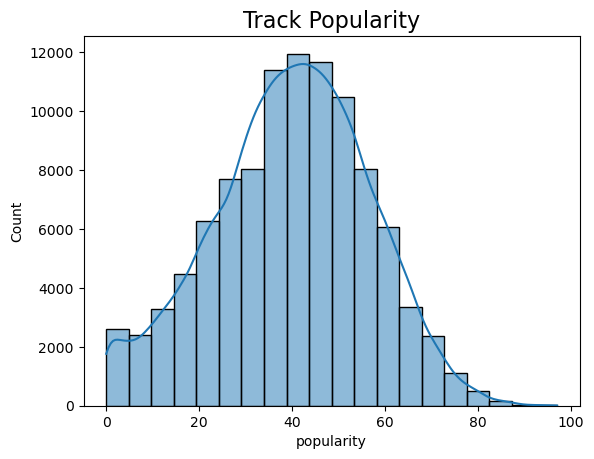

In [24]:
sns.histplot(data=tracks, x='popularity', bins=20, kde=True)
plt.title('Track Popularity', fontsize=16)
plt.show()

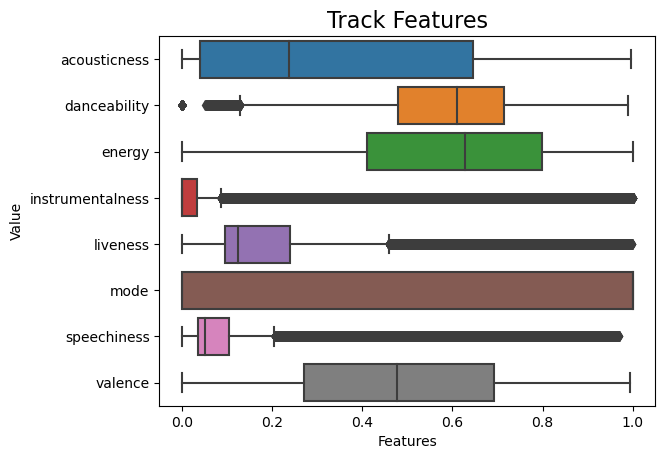

In [25]:
sns.boxplot(data=tracks[['acousticness', 'danceability', 'energy', 'instrumentalness',	'liveness',	'mode', 'speechiness', 'valence']], orient='h' )
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Track Features', fontsize=16)
plt.show()

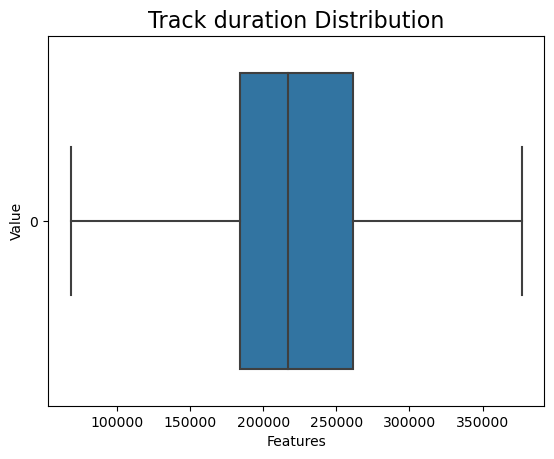

In [26]:
sns.boxplot(data=tracks['duration_ms'], orient='h', showfliers=False)
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Track duration Distribution', fontsize=16)
plt.show()

In [27]:
tracks.describe()

,acousticness,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_number,valence
count,101939.000000,101939.000000,101939.000000,1.019390e+05,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000
mean,0.352124,0.586015,1.032166,2.467708e+05,0.586479,0.148776,5.270858,0.197640,-9.462720,0.618154,39.782311,0.128841,118.358527,3.875651,4.608060,0.482813
std,0.334855,0.177724,0.566789,1.904303e+05,0.260170,0.304024,3.577679,0.175391,6.198508,0.485841,16.790769,0.203324,30.224074,0.517008,7.181805,0.261690
min,0.000000,0.000000,1.000000,1.155000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.040700,0.480000,1.000000,1.840000e+05,0.411000,0.000000,2.000000,0.095600,-11.149000,0.000000,29.000000,0.036400,95.973000,4.000000,1.000000,0.271000
50%,0.238000,0.610000,1.000000,2.168930e+05,0.629000,0.000037,5.000000,0.124000,-7.599000,1.000000,41.000000,0.050600,118.067000,4.000000,2.000000,0.477000
75%,0.645000,0.714000,1.000000,2.610550e+05,0.798000,0.034400,8.000000,0.241000,-5.509000,1.000000,52.000000,0.104000,136.045000,4.000000,6.000000,0.693000
max,0.996000,0.989000,81.000000,5.505831e+06,1.000000,1.000000,11.000000,0.999000,2.719000,1.000000,97.000000,0.969000,244.035000,5.000000,655.000000,0.993000


/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_14857/3710987268.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(tracks.corr()))
/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_14857/3710987268.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(tracks.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')


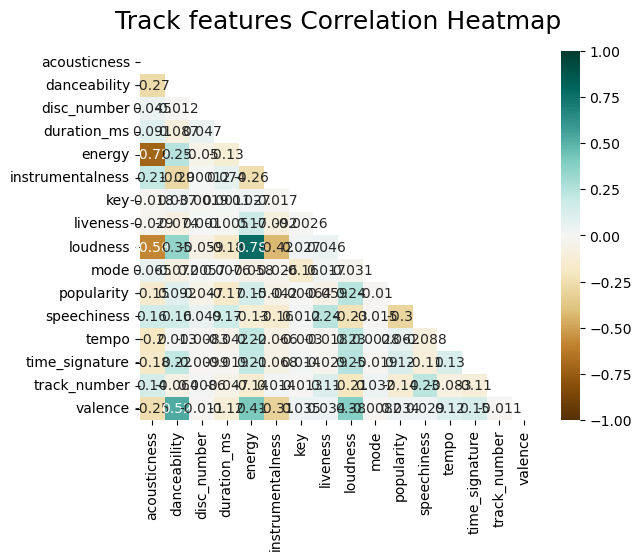

In [28]:
mask = np.triu(np.ones_like(tracks.corr()))
heatmap = sns.heatmap(tracks.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Track features Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

In [29]:
tracks.corr().popularity.sort_values(ascending=False)

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_14857/2703675777.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tracks.corr().popularity.sort_values(ascending=False)


popularity          1.000000
loudness            0.239679
energy              0.153979
time_signature      0.121505
danceability        0.092382
tempo               0.061869
valence             0.034412
key                -0.000641
mode               -0.010003
instrumentalness   -0.041537
disc_number        -0.047331
liveness           -0.059116
track_number       -0.139460
acousticness       -0.154408
duration_ms        -0.169125
speechiness        -0.304212
Name: popularity, dtype: float64

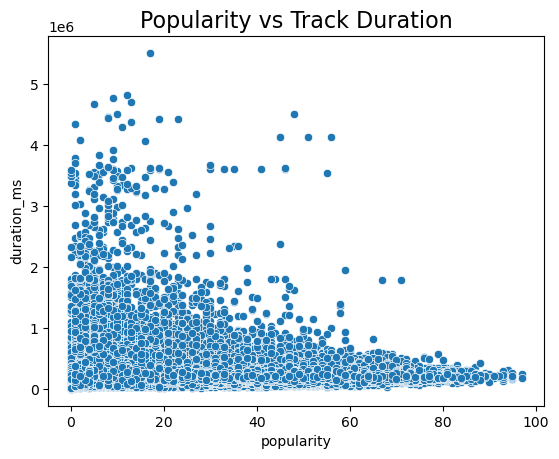

In [30]:
sns.scatterplot(x="popularity", y="duration_ms", data=tracks)
plt.title('Popularity vs Track Duration', fontsize=16)
plt.show()

<AxesSubplot: xlabel='loudness', ylabel='energy'>

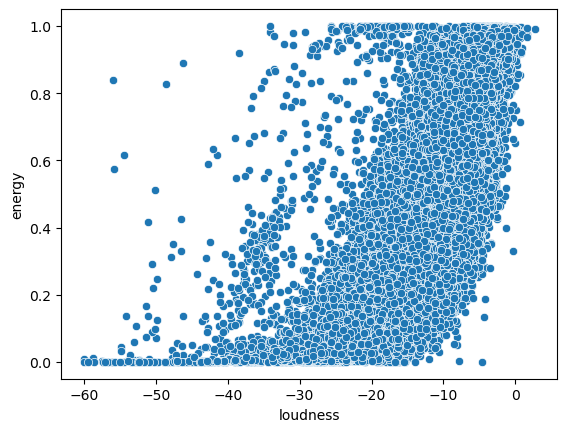

In [31]:
sns.scatterplot(x="loudness", y="energy", data=tracks)


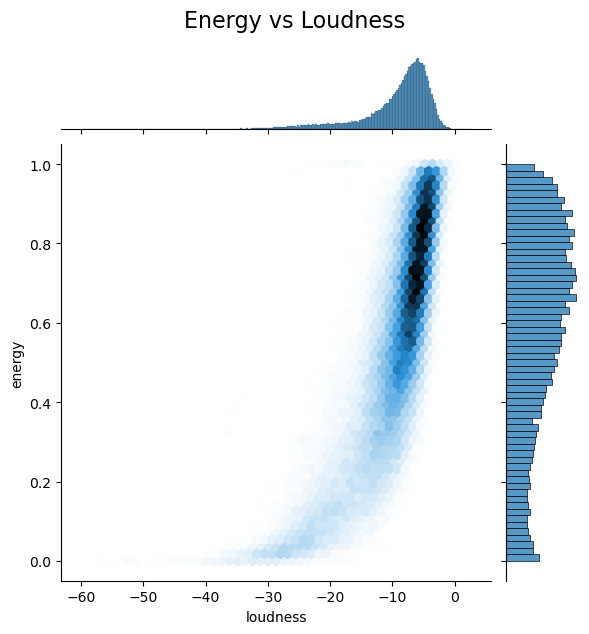

In [32]:
sns.jointplot(x="loudness", y="energy", data=tracks, kind="hex")
plt.suptitle('Energy vs Loudness', y=1.05, fontsize=16)
plt.show()

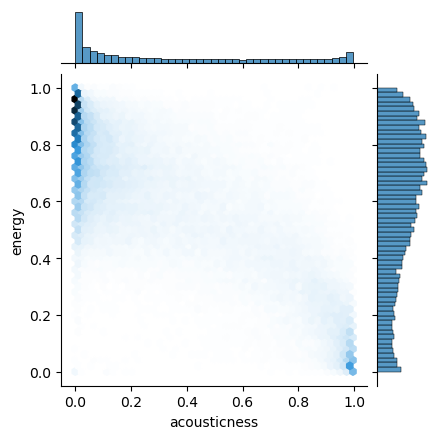

In [33]:
sns.jointplot(x="acousticness", y="energy", data=tracks, kind="hex", height=4.5)


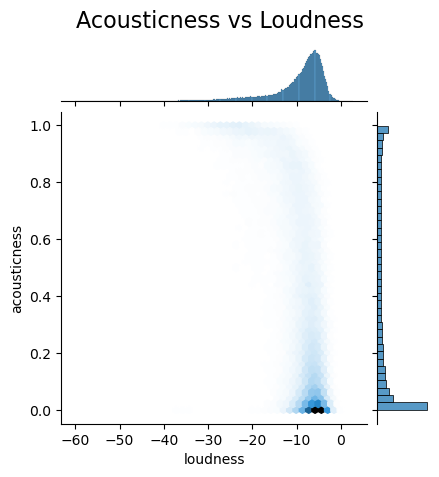

In [34]:
sns.jointplot(x="loudness", y="acousticness", data=tracks, kind="hex", height=4.5)
plt.suptitle('Acousticness vs Loudness', y=1.05, fontsize=16)
plt.show()

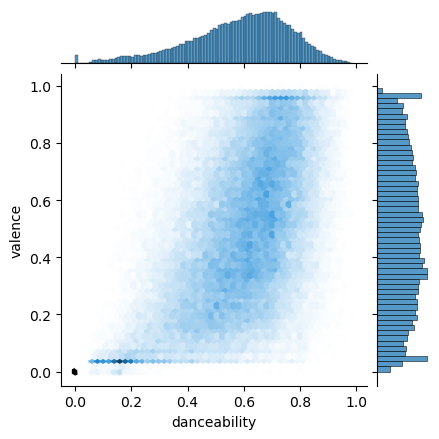

In [35]:
sns.jointplot(x="danceability", y="valence", data=tracks, kind="hex", height=4.5)


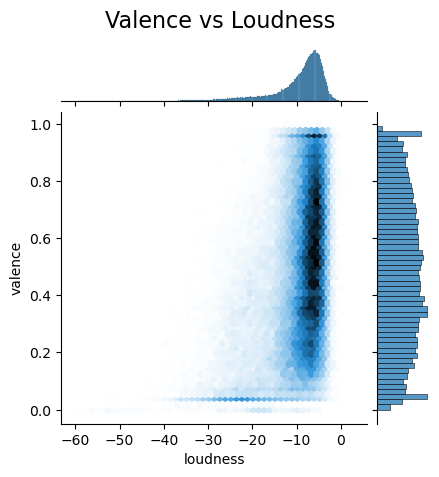

In [36]:
sns.jointplot(x="loudness", y="valence", data=tracks, kind="hex", height=4.5)
plt.suptitle('Valence vs Loudness', y=1.05, fontsize=16)
plt.show()

In [37]:
all_data_sources = tracks.merge(albums, how='left', left_on='id', right_on='track_id', suffixes=('_track','_albums')).merge(artists, how='left', left_on='artist_id', right_on='id', suffixes=('_track','_artists'))

In [38]:
all_data_sources.head()

,acousticness,album_id,analysis_url,artists_id,available_markets_track,country,danceability,disc_number,duration_ms,energy,...,type_albums,release_year,artist_popularity,followers,genres,id,name,track_id_artists,track_name_prev,type
0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",BE,0.698,1.0,235584.0,0.606,...,album,2018.0,28.0,425.0,[finnish indie],3mxJuHRn2ZWD5OofvJtDZY,Jesse Markin,3THTkAwJOsmxgizvYkBNRI,track_19,artist
1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",BE,0.719,1.0,656960.0,0.308,...,album,2011.0,36.0,2965.0,[],4xWMewm6CYMstu0sPgd9jJ,Favorite Kids Stories,3VAX2MJdmdqARLSU5hPMpm,track_5,artist
2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],[GB],BE,0.466,1.0,492840.0,0.931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",BE,0.719,1.0,316578.0,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],[GB],BE,0.460,1.0,558880.0,0.942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
all_data_sources[['popularity', 'artist_popularity', 'followers']].isna().sum()

popularity               0
artist_popularity    26956
followers            26956
dtype: int64

In [40]:
all_data_sources[['popularity', 'artist_popularity', 'followers']].dropna().corr() #popularity is track popularity

,popularity,artist_popularity,followers
popularity,1.000000,0.674014,0.254491
artist_popularity,0.674014,1.000000,0.378466
followers,0.254491,0.378466,1.000000


## EDA - Audio Features

**Data Dictionary**

The following data set provides an overview of 207 audio features for each track.

In [41]:
audio_features = pd.read_csv('SpotGenTrack/Features Extracted/low_level_audio_features.csv', index_col = 0)

In [42]:
audio_features.head()

,Chroma_1,Chroma_10,Chroma_11,Chroma_12,Chroma_2,Chroma_3,Chroma_4,Chroma_5,Chroma_6,Chroma_7,...,Tonnetz_4,Tonnetz_5,Tonnetz_6,ZCR,entropy_energy,spectral_bandwith,spectral_centroid,spectral_rollOff_max,spectral_rollOff_min,track_id
0,0.438296,0.472769,0.427441,0.436688,0.467697,0.493862,0.512244,0.568658,0.560524,0.513068,...,0.018434,-0.001759,-0.006392,0.067966,-89.113389,2564.247669,3558.400706,4508.506071,367.831109,19YEk4OVQZn3GfoxbpNrU6
1,0.596605,0.368288,0.285263,0.302211,0.905805,0.510909,0.221708,0.311248,0.491277,0.416469,...,0.046941,0.005665,-0.026928,0.047308,-127.945239,2370.181495,1499.689590,3647.394611,230.165275,6zJms3MX11Qu1IKF44LoRW
2,0.505224,0.500420,0.506773,0.488258,0.498356,0.573582,0.690761,0.742858,0.686282,0.657118,...,-0.006929,0.004968,0.008947,0.058463,-238.285176,2973.294736,1543.550034,5623.349330,187.290534,1WugzepXsLjnsM0K4UaWYc
3,0.525690,0.666469,0.579492,0.498920,0.598528,0.631578,0.501693,0.500468,0.587101,0.546499,...,-0.027382,-0.009689,0.001402,0.080547,-148.785733,2716.749483,3017.248824,5799.931595,160.940693,1pSlTbCrUJ9rmwj5CNNrX4
4,0.632214,0.503698,0.496942,0.611532,0.634613,0.697265,0.557012,0.530836,0.444279,0.466659,...,0.003728,-0.002780,-0.010120,0.084945,-176.618314,3096.692876,2118.686992,6560.018666,229.131948,5yruvWJs3mL00w4slpCVzN


In [43]:
audio_features.columns

Index(['Chroma_1', 'Chroma_10', 'Chroma_11', 'Chroma_12', 'Chroma_2',
       'Chroma_3', 'Chroma_4', 'Chroma_5', 'Chroma_6', 'Chroma_7',
       ...
       'Tonnetz_4', 'Tonnetz_5', 'Tonnetz_6', 'ZCR', 'entropy_energy',
       'spectral_bandwith', 'spectral_centroid', 'spectral_rollOff_max',
       'spectral_rollOff_min', 'track_id'],
      dtype='object', length=208)

In [44]:
audio_features.describe()

,Chroma_1,Chroma_10,Chroma_11,Chroma_12,Chroma_2,Chroma_3,Chroma_4,Chroma_5,Chroma_6,Chroma_7,...,Tonnetz_3,Tonnetz_4,Tonnetz_5,Tonnetz_6,ZCR,entropy_energy,spectral_bandwith,spectral_centroid,spectral_rollOff_max,spectral_rollOff_min
count,101909.000000,101909.000000,101909.000000,101909.000000,101909.000000,101909.000000,101909.000000,101909.000000,101909.000000,101909.000000,...,101909.000000,101909.000000,101909.000000,101909.000000,101909.000000,101909.000000,101909.000000,101909.000000,101909.000000,101909.000000
mean,0.491150,0.493458,0.471575,0.462471,0.481123,0.487489,0.484347,0.496251,0.493217,0.497671,...,-0.002073,0.005975,0.001143,0.001435,0.058544,-159.721729,2871.869938,2702.728780,5328.771980,184.972059
std,0.117287,0.116477,0.110333,0.111736,0.109536,0.118358,0.112019,0.118717,0.116065,0.114048,...,0.047891,0.049153,0.009006,0.009612,0.023824,51.032580,672.087737,1219.417150,1811.378503,110.921078
min,0.033948,0.011642,0.011232,0.010693,0.033748,0.020676,0.016802,0.008113,0.007412,0.009128,...,-0.375904,-0.377345,-0.146779,-0.155205,0.002802,-352.520453,320.831680,0.000000,154.607398,0.308331
25%,0.415335,0.418296,0.401015,0.389863,0.409673,0.410272,0.412065,0.418987,0.417883,0.423879,...,-0.030148,-0.022488,-0.003508,-0.003766,0.042341,-194.161958,2566.454061,1887.678738,4264.315881,124.732579
50%,0.488723,0.492847,0.471640,0.461675,0.479698,0.484818,0.482367,0.493705,0.491719,0.496572,...,-0.001515,0.005721,0.001087,0.001021,0.057246,-160.963637,2985.705700,2490.469008,5517.824968,162.874015
75%,0.563149,0.566978,0.540971,0.533485,0.549272,0.560465,0.553222,0.569871,0.565780,0.569179,...,0.026030,0.034651,0.005764,0.006086,0.072449,-127.664956,3315.728368,3252.257693,6548.460402,213.857040
max,1.000000,0.999983,1.000000,0.999863,1.000000,1.000000,0.999945,1.000000,0.999369,0.997828,...,0.477255,0.376723,0.086532,0.139061,0.379803,-0.003809,6447.512667,11025.000009,16796.556767,6259.870481


In [45]:
audio_features.corr() # Not informative. Maybe we should use dimensionality reduction?

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_14857/1350127722.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  audio_features.corr() # Not informative. Maybe we should use dimensionality reduction?


,Chroma_1,Chroma_10,Chroma_11,Chroma_12,Chroma_2,Chroma_3,Chroma_4,Chroma_5,Chroma_6,Chroma_7,...,Tonnetz_3,Tonnetz_4,Tonnetz_5,Tonnetz_6,ZCR,entropy_energy,spectral_bandwith,spectral_centroid,spectral_rollOff_max,spectral_rollOff_min
Chroma_1,1.000000,0.082139,0.226731,0.591271,0.667772,0.216693,0.157394,0.202483,0.225986,0.157749,...,-0.015494,0.379917,0.090305,0.238941,0.239122,0.011629,0.132236,0.102848,0.166421,0.099693
Chroma_10,0.082139,1.000000,0.704334,0.287917,0.186024,0.206295,0.158141,0.190115,0.165352,0.151471,...,-0.327864,-0.060428,-0.062967,0.083100,0.293281,-0.015421,0.166138,0.141355,0.209354,0.133070
Chroma_11,0.226731,0.704334,1.000000,0.692413,0.163605,0.187952,0.233684,0.171508,0.213742,0.205623,...,-0.001424,-0.300288,0.009237,-0.099484,0.324616,0.028700,0.162885,0.142964,0.214079,0.193725
Chroma_12,0.591271,0.287917,0.692413,1.000000,0.235905,0.091004,0.187963,0.237116,0.181992,0.225680,...,0.329010,0.024561,-0.119595,-0.128220,0.310524,0.094123,0.115575,0.112475,0.167865,0.214444
Chroma_2,0.667772,0.186024,0.163605,0.235905,1.000000,0.695228,0.343848,0.152661,0.187067,0.203951,...,-0.302123,-0.037755,0.078505,0.028373,0.271081,0.007602,0.152601,0.116015,0.190939,0.115527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
entropy_energy,0.011629,-0.015421,0.028700,0.094123,0.007602,0.026777,-0.009265,-0.016076,-0.059463,-0.085104,...,0.041376,-0.022454,-0.043893,-0.084268,-0.029755,1.000000,-0.341153,-0.166340,-0.296981,0.113202
spectral_bandwith,0.132236,0.166138,0.162885,0.115575,0.152601,0.130313,0.164449,0.155000,0.182838,0.211834,...,-0.013731,-0.003356,0.019231,0.031124,0.640449,-0.341153,1.000000,0.520882,0.951494,0.069652
spectral_centroid,0.102848,0.141355,0.142964,0.112475,0.116015,0.098728,0.125718,0.120482,0.142383,0.156449,...,-0.005371,-0.002193,0.000655,0.002762,0.511711,-0.166340,0.520882,1.000000,0.566911,0.219805
spectral_rollOff_max,0.166421,0.209354,0.214079,0.167865,0.190939,0.166115,0.205764,0.195058,0.226465,0.251603,...,-0.010724,-0.007778,0.009848,0.016462,0.786952,-0.296981,0.951494,0.566911,1.000000,0.191750


In [46]:
tracks_audio_features = tracks.merge(audio_features, how='left', left_on='id', right_on='track_id')

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_14857/2219795289.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tracks_audio_features.corr().popularity.sort_values(ascending=False).to_frame(), vmin=-1, vmax=1, annot=True)


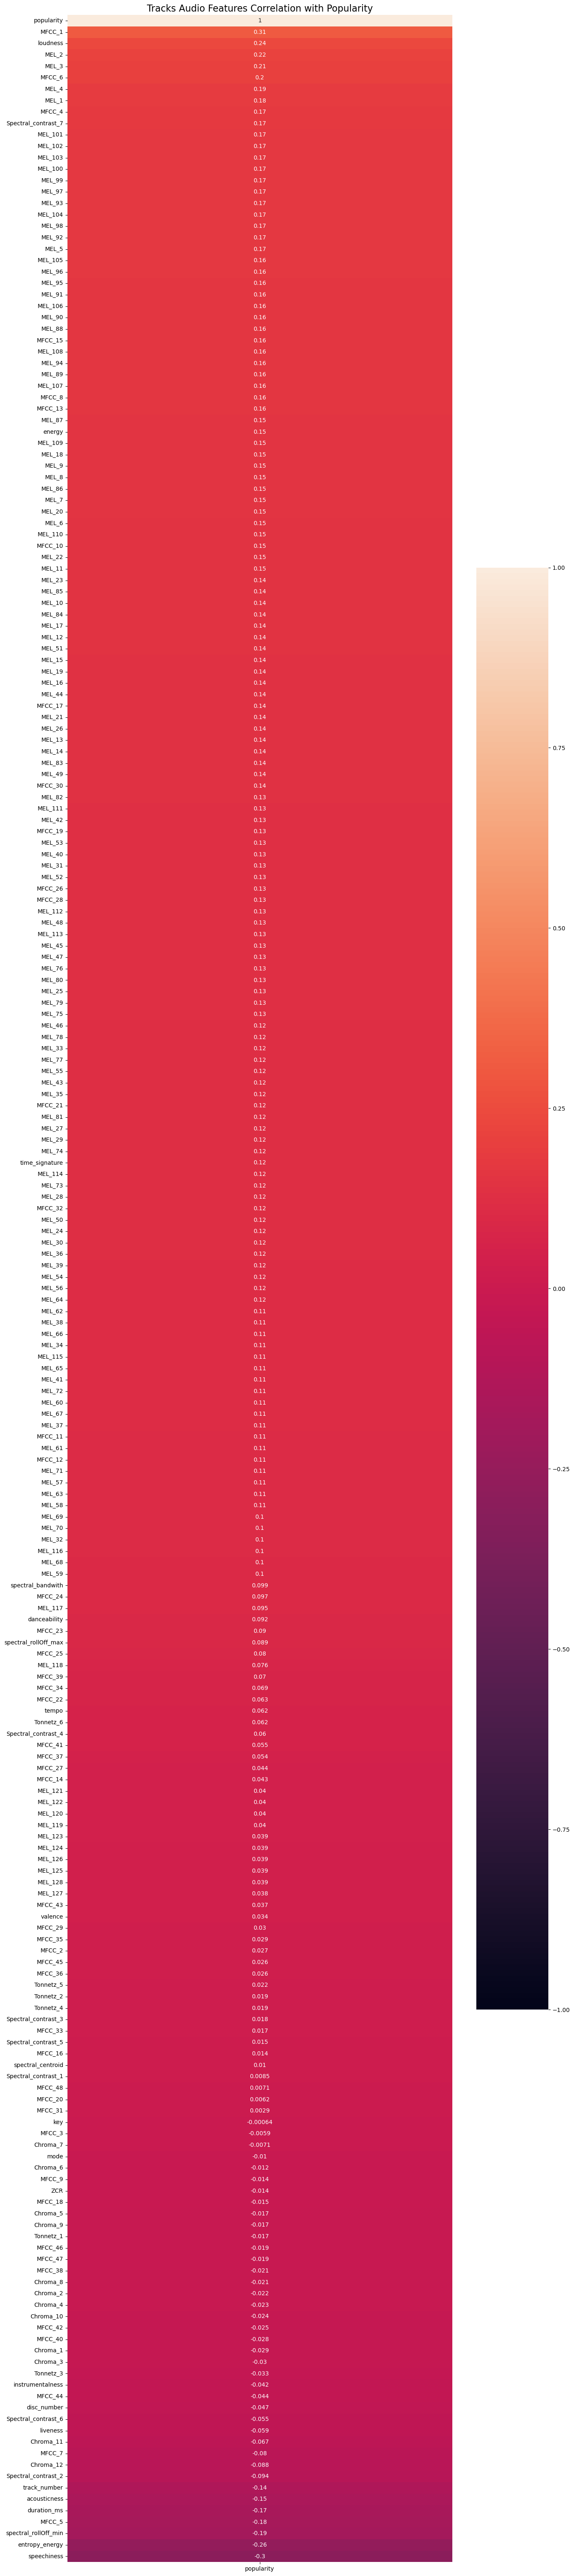

In [47]:
fig, ax = plt.subplots(figsize=(15, 80))
sns.heatmap(tracks_audio_features.corr().popularity.sort_values(ascending=False).to_frame(), vmin=-1, vmax=1, annot=True)
plt.title("Tracks Audio Features Correlation with Popularity", fontsize=16)
plt.show()

## EDA - Lyrics Features

**Data Dictionary**

The following data dictionary provides an overview of the variables found in the Spotify lyrics_features dataset. 

* **mean_syllables_word**: Average syllables per word

* **mean_words_sentence**: average words per sentence

* **n_sentences**: number of sentences per track

* **n_words**: number of words per track

* **sentence_similarity**: Percentage of similarity between sentences. From 0 to 1

* **track_id**: Track unique ID

* **vocabulary_wealth**: Percentage from 0 to 1

***-1 when no lyrics in tracks dataframe***


In [48]:
lyrics_features = pd.read_csv('SpotGenTrack/Features Extracted/lyrics_features.csv', index_col = 0)

In [49]:
lyrics_features.head()

,mean_syllables_word,mean_words_sentence,n_sentences,n_words,sentence_similarity,track_id,vocabulary_wealth
0,-1.00,-1.00,-1,-1,-1.000000,5KIfHjHI5NIsPHNt58qua0,-1.00
1,1.10,5.65,31,326,0.043011,13keyz9ikBe6ZpRasw7l4X,0.45
2,1.37,4.77,74,532,0.050352,1WugzepXsLjnsM0K4UaWYc,0.59
3,1.95,3.38,72,430,0.028560,2MO6oEAlMKcsfI8xP3yoy8,0.49
4,1.16,2.99,68,368,0.047849,1i4St7fmSUE9nB3R9n8fol,0.47


In [50]:
lyrics_features.columns

Index(['mean_syllables_word', 'mean_words_sentence', 'n_sentences', 'n_words',
       'sentence_similarity', 'track_id', 'vocabulary_wealth'],
      dtype='object')

In [51]:
lyrics_features[lyrics_features.n_words == -1]

,mean_syllables_word,mean_words_sentence,n_sentences,n_words,sentence_similarity,track_id,vocabulary_wealth
0,-1.0,-1.0,-1,-1,-1.0,5KIfHjHI5NIsPHNt58qua0,-1.0
36,-1.0,-1.0,-1,-1,-1.0,36fswRCmYh3PZut815LyhH,-1.0
38,-1.0,-1.0,-1,-1,-1.0,2kgxYag8woDOgxFIrkGyYc,-1.0
41,-1.0,-1.0,-1,-1,-1.0,4aZsMBnqCHrU3V4kC6sxoh,-1.0
43,-1.0,-1.0,-1,-1,-1.0,2sbUWtAhUyGYXiCch6OcmO,-1.0
...,...,...,...,...,...,...,...
94905,-1.0,-1.0,-1,-1,-1.0,0ocJfFZr54mVbzLAtgHCjT,-1.0
94906,-1.0,-1.0,-1,-1,-1.0,1UTdsgXAFqyJjEERtaVT8r,-1.0
94907,-1.0,-1.0,-1,-1,-1.0,2bMDbfxlaViTIBfSOfIXHX,-1.0
94909,-1.0,-1.0,-1,-1,-1.0,6xAzjMg1rOv3amGihpzMw6,-1.0


In [52]:
lyrics_features.describe()

,mean_syllables_word,mean_words_sentence,n_sentences,n_words,sentence_similarity,vocabulary_wealth
count,94954.000000,94954.000000,94954.000000,94954.000000,94954.000000,94954.000000
mean,1.054448,3.590286,42.949649,316.901995,-0.114327,0.302671
std,0.968960,9.632294,45.001476,871.511267,0.396067,0.586538
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.150000,2.570000,22.000000,125.000000,0.008658,0.400000
50%,1.270000,3.290000,41.000000,238.000000,0.035294,0.540000
75%,1.520000,4.000000,59.000000,356.000000,0.066288,0.630000
max,4.000000,819.200000,2519.000000,39111.000000,0.964286,0.780000


/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_14857/3281956255.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(lyrics_features.corr()))
/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_14857/3281956255.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(lyrics_features.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')


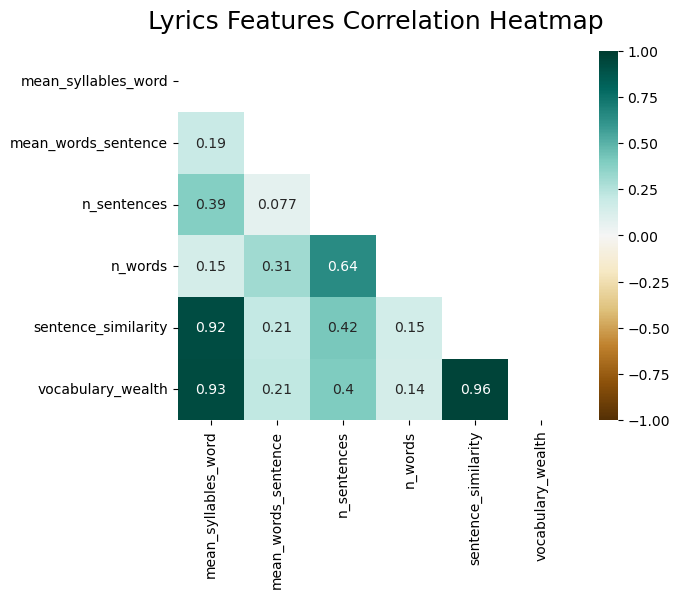

In [53]:
mask = np.triu(np.ones_like(lyrics_features.corr()))
heatmap = sns.heatmap(lyrics_features.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Lyrics Features Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

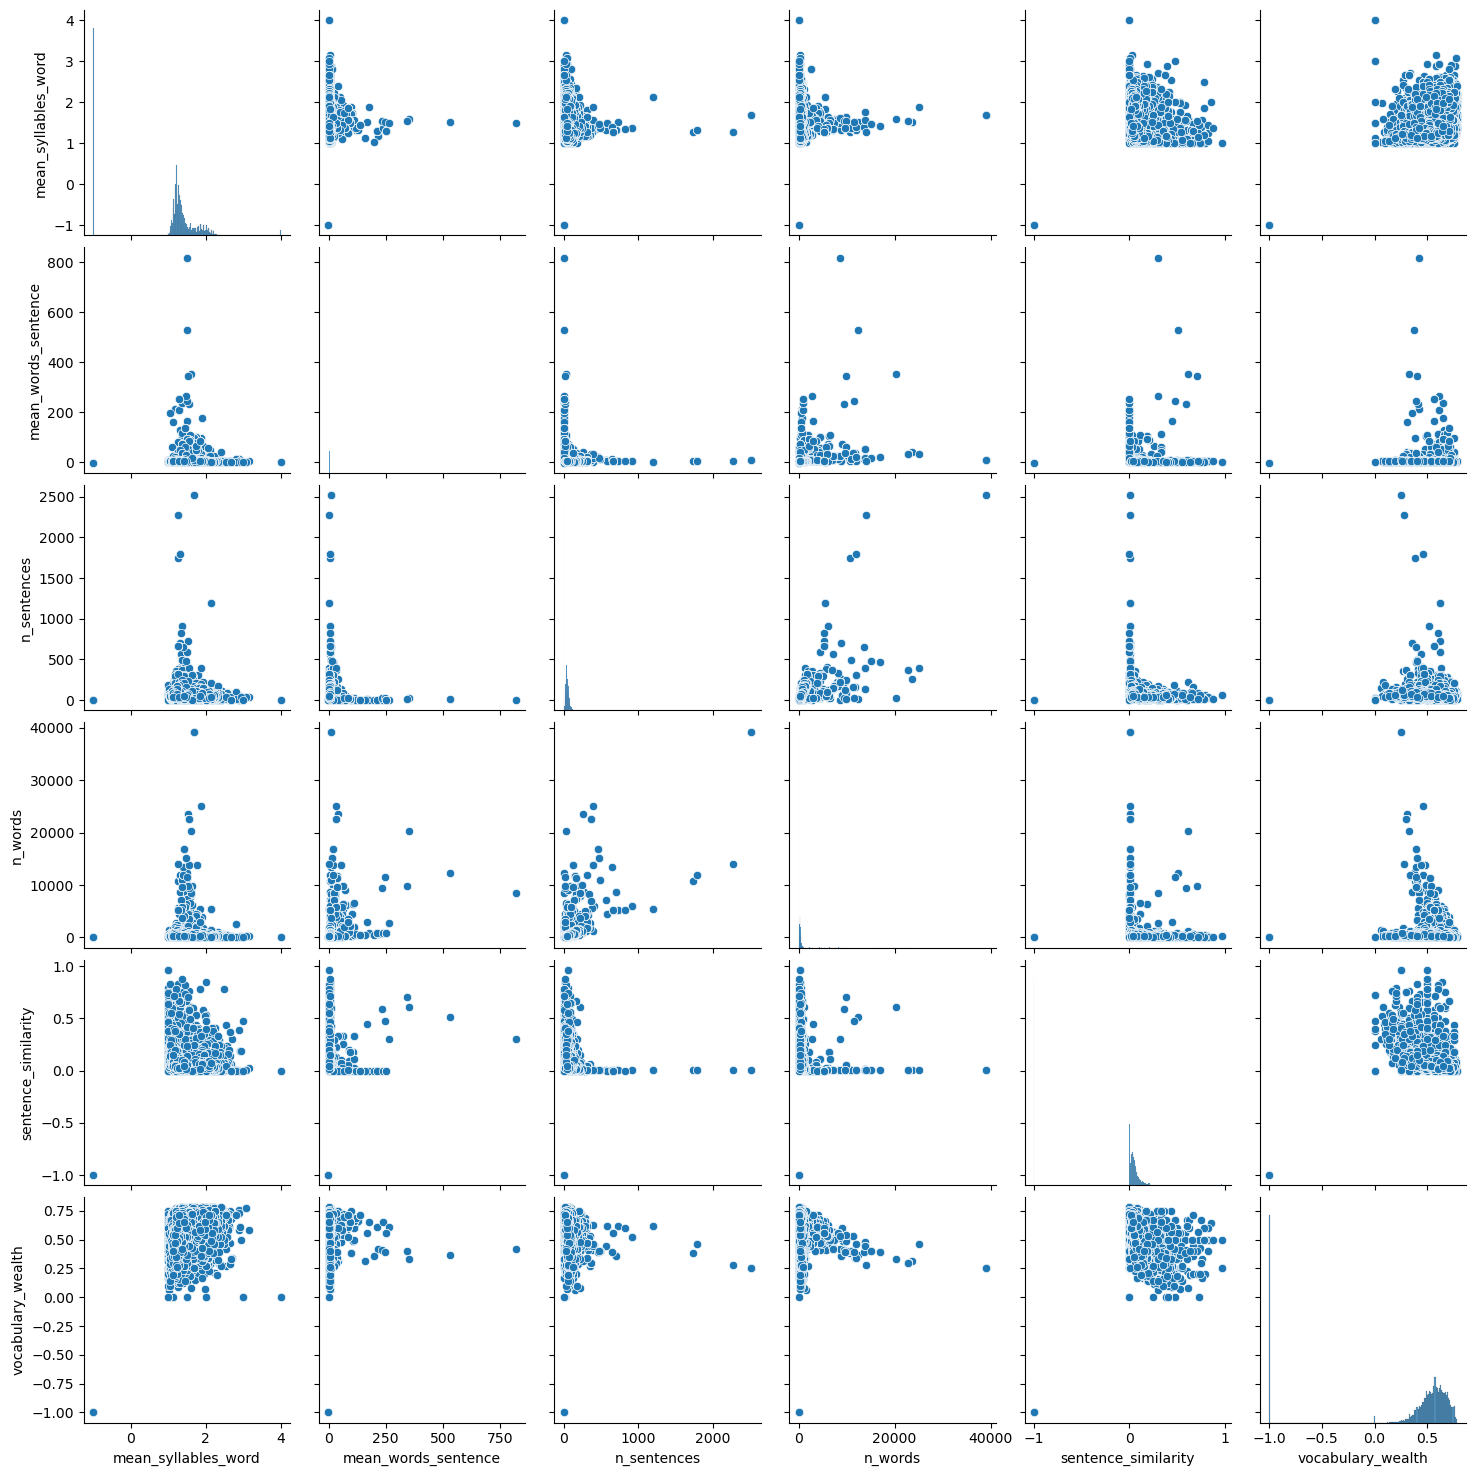

In [54]:
sns.pairplot(data=lyrics_features)


## 2nd part

Now that we have conducted a thorough Exploratory Data Analysis on all the datasets, it's time to prepare our data for further analysis and modeling. 
One crucial step in this process is **Dimensionality Reduction**, which helps us identify and retain the most important features in our data while reducing the complexity and noise caused by a large number of features.

We will focus on the audio features dataset, as it has 207 columns. It contains various numerical features, and applying dimensionality reduction techniques like PCA can help us find the most significant components that explain the majority of the variance in the data.

So, let's perform dimensionality reduction on the audio features dataset using PCA. We will first separate the numeric and non-numeric columns, as PCA can only be applied to numeric columns. Next, we standardize the numeric data to ensure that all features are on the same scale. This is an essential step because PCA is sensitive to the scale of the features.

Once the data is standardized, we apply PCA with the number of components set to explain 95% of the variance in the data. This will help us retain most of the information while reducing the dimensionality of the dataset. 

By reducing the dimensionality of our data, we can simplify our analysis and modeling process while retaining the most important information. This will help us focus on the key features that have a significant impact on a song's popularity, making our models more efficient and interpretable.

In [55]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Calculate the population of the available markets

In [56]:
# Define a helper function to sum population
def get_sum_population(x):
    if x is not None:
        populations = [pypopulation.get_population(i) for i in x]
        filtered_populations = [pop for pop in populations if pop is not None]
        return sum(filtered_populations)
    else:
        return 0

In [57]:
#for albums
albums['album_sum_available_markets_population'] = albums['available_markets'].apply(get_sum_population)
#for tracks
tracks['sum_available_markets_population'] = tracks['available_markets'].apply(get_sum_population)

## PREPROCESSING PIPELINE

We're now ready to move on to the next step, which is the **preprocessing** of our data. 

In this stage, we will prepare the data for our machine learning models by performing a series of transformations that will ensure our models can efficiently learn from the data.

------------------------

First, we examined the correlations between the numerical features and the target variable, 'popularity'. By doing this, we gained a better understanding of which features have the **strongest relationship with popularity**, allowing us to focus on the most relevant features.

In [58]:
#check for correlations of numerical features
num_attribs = tracks.select_dtypes(include=['float64', 'int64']).columns
numerical_corr_matrix = tracks[num_attribs].corr().abs()

# Display the correlations between the label (e.g., 'popularity') and other numerical columns
label_correlations = numerical_corr_matrix['popularity'].sort_values(ascending=False)
print(label_correlations)

popularity                          1.000000
speechiness                         0.304212
loudness                            0.239679
duration_ms                         0.169125
acousticness                        0.154408
energy                              0.153979
track_number                        0.139460
time_signature                      0.121505
danceability                        0.092382
tempo                               0.061869
liveness                            0.059116
disc_number                         0.047331
instrumentalness                    0.041537
valence                             0.034412
sum_available_markets_population    0.019857
mode                                0.010003
key                                 0.000641
Name: popularity, dtype: float64


-----------
Given the results, we decided to include only those numerical columns with a correlation **greater than 0.09**. This helped to eliminate less important features and reduce the noise in our data. 

We also filtered the albums and artists datasets to keep only the most relevant columns.

In [59]:
#include numerical columns with correlation greater than 0.09
include_col_tracks = ["sum_available_markets_population","country","album_id","artists_id","id","lyrics", "time_signature","track_number","energy","acousticness","duration_ms","loudness","speechiness","danceability", "popularity"]
tracks_filtered = tracks[include_col_tracks]


In [60]:
albums_include = ['type','album_type', 'artist_id', 'album_sum_available_markets_population','total_tracks', 'track_id', 'release_date',"id"]
albums_filtered = albums[albums_include]

In [61]:
artists_include = ['artist_popularity', 'followers', 'genres', 'id', 'name', 'track_id']
artists_filtered = artists[artists_include]

In [62]:
#merge all dataframes
all_data_sources = tracks_filtered.merge(albums_filtered, how='left', left_on='album_id', right_on='id', suffixes=('_track','_albums')).merge(artists_filtered, how='left', left_on='artist_id', right_on='id', suffixes=('_track','_artists'))
all_data_sources = all_data_sources.merge(audio_features, how="left", left_on="id_track", right_on='track_id', suffixes=('_track','_audio-features')).merge(lyrics_features, how="left", left_on="id_track", right_on='track_id', suffixes=('_tracks','_lyrics-features'))

In [63]:
all_data_sources.isnull().sum()


sum_available_markets_population       0
country                                0
album_id                               0
artists_id                             0
id_track                               0
                                    ... 
n_sentences                         6985
n_words                             6985
sentence_similarity                 6985
track_id_lyrics-features            6985
vocabulary_wealth                   6985
Length: 244, dtype: int64

In [64]:
#Replace NaN w/ median
all_data_sources = all_data_sources.fillna(all_data_sources.median())

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_14857/2733319423.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  all_data_sources = all_data_sources.fillna(all_data_sources.median())
/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_14857/2733319423.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_data_sources = all_data_sources.fillna(all_data_sources.median())


In [65]:
#check missing values again
all_data_sources.isnull().sum()


sum_available_markets_population       0
country                                0
album_id                               0
artists_id                             0
id_track                               0
                                    ... 
n_sentences                            0
n_words                                0
sentence_similarity                    0
track_id_lyrics-features            6985
vocabulary_wealth                      0
Length: 244, dtype: int64

In [67]:
all_data = all_data_sources
corr_num = all_data.corrwith(all_data['popularity']).abs().sort_values(ascending=False)
corr_num

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_14857/4040738530.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_num = all_data.corrwith(all_data['popularity']).abs().sort_values(ascending=False)


popularity           1.000000
artist_popularity    0.644261
MFCC_1               0.305849
speechiness          0.304212
followers            0.286130
                       ...   
MFCC_48              0.007123
Chroma_7             0.007078
MFCC_20              0.006246
MFCC_3               0.005888
MFCC_31              0.002862
Length: 227, dtype: float64

In [68]:
all_data.columns.to_list()
drop_all = ["id_track","track_id_track","id_albums", "track_id_artists", "track_id_tracks", "track_id_lyrics-features", "album_id", "artists_id", "lyrics", "artist_id", "name", "id", "type"]  
all_data = all_data.drop(columns=drop_all)

In [69]:
all_data.columns.to_list()


['sum_available_markets_population',
 'country',
 'time_signature',
 'track_number',
 'energy',
 'acousticness',
 'duration_ms',
 'loudness',
 'speechiness',
 'danceability',
 'popularity',
 'album_type',
 'album_sum_available_markets_population',
 'total_tracks',
 'release_date',
 'artist_popularity',
 'followers',
 'genres',
 'Chroma_1',
 'Chroma_10',
 'Chroma_11',
 'Chroma_12',
 'Chroma_2',
 'Chroma_3',
 'Chroma_4',
 'Chroma_5',
 'Chroma_6',
 'Chroma_7',
 'Chroma_8',
 'Chroma_9',
 'MEL_1',
 'MEL_10',
 'MEL_100',
 'MEL_101',
 'MEL_102',
 'MEL_103',
 'MEL_104',
 'MEL_105',
 'MEL_106',
 'MEL_107',
 'MEL_108',
 'MEL_109',
 'MEL_11',
 'MEL_110',
 'MEL_111',
 'MEL_112',
 'MEL_113',
 'MEL_114',
 'MEL_115',
 'MEL_116',
 'MEL_117',
 'MEL_118',
 'MEL_119',
 'MEL_12',
 'MEL_120',
 'MEL_121',
 'MEL_122',
 'MEL_123',
 'MEL_124',
 'MEL_125',
 'MEL_126',
 'MEL_127',
 'MEL_128',
 'MEL_13',
 'MEL_14',
 'MEL_15',
 'MEL_16',
 'MEL_17',
 'MEL_18',
 'MEL_19',
 'MEL_2',
 'MEL_20',
 'MEL_21',
 'MEL_22',
 

In [73]:
# Print out the columns with the number of missing values
missing_values = all_data.isnull().sum()
print(missing_values[missing_values > 0])


genres    795
dtype: int64


In [74]:
#drop genres
all_data.drop(columns=['genres'], inplace=True)

In [75]:
# Print out the columns with the number of missing values again
missing_values = all_data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [76]:
# Excluding highly correlated features
features_df_2 = all_data.loc[:, all_data.columns!="popularity"]
correlation_matrix = features_df_2.corr()

correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(f"Highly-correlated Features: {correlated_features}")

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_14857/256782976.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = features_df_2.corr()


Highly-correlated Features: {'MEL_126', 'MEL_125', 'MEL_107', 'MEL_117', 'MEL_128', 'vocabulary_wealth', 'MEL_115', 'MEL_83', 'MEL_85', 'MEL_99', 'MEL_104', 'MEL_88', 'MEL_110', 'MEL_120', 'MEL_124', 'MEL_114', 'MEL_121', 'MEL_91', 'MEL_89', 'MEL_103', 'MEL_123', 'MEL_102', 'MEL_127', 'MEL_98', 'album_sum_available_markets_population', 'MEL_90', 'MEL_109', 'MEL_101', 'spectral_rollOff_max', 'MEL_93', 'MEL_96', 'MEL_105', 'MEL_97', 'MEL_106', 'MEL_95', 'MEL_122', 'MEL_87', 'MEL_108'}


In [77]:
all_data = all_data[all_data.columns.difference(correlated_features)]

In [78]:
all_data.shape

(101939, 192)

In [79]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [71]:
#all_data.to_csv('all_data.csv')  

In [72]:
#all_data = pd.read_csv("all_data.csv")

In [73]:
#all_data.genres

0                                           [finnish indie]
1                                                        []
2                                  [british comedy, comedy]
3                                                        []
4                                  [british comedy, comedy]
                                ...                        
101934       [australian alternative rock, australian rock]
101935    [alternative metal, alternative rock, australi...
101936    [alternative metal, alternative rock, australi...
101937    [australian reggae fusion, australian ska, ska...
101938       [australian alternative rock, australian rock]
Name: genres, Length: 101939, dtype: object

In [74]:
#import pandas as pd
#import ast
#from collections import Counter
#import numpy as np


# Convert strings to actual lists, handling NaN values
#all_data['genres'] = all_data['genres'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

#change here the amount of genres
#top_x_genres = 200

# Count occurrences of each genre in all lists combined
#genre_counter = Counter()
#for genre_list in all_data['genres']:
#    if isinstance(genre_list, list):
#        genre_counter.update(genre_list)

# Get the top 100 genres
#top_100_genres = [genre for genre, count in genre_counter.most_common(top_x_genres)]

# Display the top 100 genres
#print("Top 100 Genres:", top_100_genres)

# Remove genres not in the top 100
#def filter_genres(genre_list):
 #   if isinstance(genre_list, list):
  #      return [genre for genre in genre_list if genre in top_100_genres]
  #  return genre_list

#all_data['processed_genres'] = all_data['genres'].apply(filter_genres)


Top 100 Genres: ['pop', 'dance pop', 'latin', 'rock', 'latin pop', 'edm', 'folk-pop', 'tropical house', 'modern rock', 'pop rap', 'indie folk', 'r&b', 'latin rock', 'rock en espanol', 'latin alternative', 'indie rock', 'tropical', 'post-teen pop', 'hoerspiel', 'rap', 'electro house', 'classical', 'electropop', 'chamber pop', 'indie pop', 'pop rock', 'hip hop', 'indietronica', 'swedish pop', 'neo mellow', 'new americana', 'stomp and holler', 'europop', 'alternative r&b', 'mellow gold', 'funk', 'house', 'art pop', 'classic rock', 'urban contemporary', 'big room', 'progressive house', 'mexican pop', 'album rock', 'argentine rock', 'soft rock', 'focus', 'guidance', 'soul', 'alternative rock', 'trap music', 'dutch pop', 'indie r&b', 'desi hip hop', 'alternative metal', 'latin arena pop', 'filmi', 'garage rock', 'folk rock', 'pop edm', 'indie poptimism', 'desi', 'post-grunge', 'finnish pop', 'southern hip hop', 'vapor soul', 'modern bollywood', 'new wave pop', 'permanent wave', 'finnish danc

In [75]:
#len(genre_counter)

2373

In [76]:
#all_data['processed_genres']

0                                                        []
1                                                        []
2                                                  [comedy]
3                                                        []
4                                                  [comedy]
                                ...                        
101934                                                   []
101935    [alternative metal, alternative rock, nu metal...
101936    [alternative metal, alternative rock, nu metal...
101937                                                   []
101938                                                   []
Name: processed_genres, Length: 101939, dtype: object

In [79]:
#define features and labels 
#X = all_data.drop(columns=["popularity"])
#y = all_data["popularity"]

In [80]:
#train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)
#train_data.corr().sort_values(by="popularity",ascending=False)["popularity"]

C:\Users\mundt\AppData\Local\Temp\ipykernel_20732\255386065.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr().sort_values(by="popularity",ascending=False)["popularity"]


popularity              1.000000
artist_popularity       0.646580
MFCC_1                  0.304478
followers               0.285169
loudness                0.237553
                          ...   
duration_ms            -0.164460
MFCC_5                 -0.171639
spectral_rollOff_min   -0.182754
entropy_energy         -0.261620
speechiness            -0.302021
Name: popularity, Length: 227, dtype: float64

------
After splitting our data into training and testing sets, we created a **custom preprocessing pipeline**. 

This pipeline is designed to handle both numerical and categorical features. For numerical features, we used a simple imputer to fill any missing values with the median of the respective columns and then standardized the data using a standard scaler. For categorical features, we utilized one-hot encoding to convert them into a format suitable for machine learning algorithms.

# Moni work here

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
import scipy.sparse as sp

# Define your features and labels
X = all_data.drop(columns=["popularity"])
y = all_data["popularity"]


# Define DataFrameSelector class
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]


# Define the preprocessor function
def get_preprocessor(data):
    num_attribs = data.select_dtypes(include=np.number).columns
    cat_attribs = data.select_dtypes(include=['object']).columns

    num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
        ])

    cat_pipeline = Pipeline([
            ('selector', DataFrameSelector(cat_attribs)),
            ('cat_encoder', OneHotEncoder(sparse=True, handle_unknown='ignore')),
        ])

    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ], sparse_threshold=0.5)

    return full_pipeline


# Define function to create prepared dataframe
def create_prepared_dataframe(data, preprocessor, cat_attribs):
    transformed_cols = preprocessor.transformers_[0][2].tolist() + list(preprocessor.named_transformers_['cat']['cat_encoder'].get_feature_names_out(cat_attribs))

    if isinstance(data, np.ndarray):
        data_prepared = pd.DataFrame(data, columns=transformed_cols)
    else:
        if sp.issparse(data):
            data_prepared = pd.DataFrame.sparse.from_spmatrix(data, columns=transformed_cols)
        else:
            data_prepared = pd.DataFrame(data, columns=transformed_cols)

    return data_prepared


# Get preprocessors using the train_data
preprocessor = get_preprocessor(X)

# Fit and transform the training data
X_prepared_array = preprocessor.fit_transform(X)

# Transform the test data using the same preprocessor
#X_test_prepared_array = preprocessor.transform(X_test)
#X_prepared = preprocessor.transform(X)

# Get categorical attributes for creating prepared dataframe
cat_attribs = X.select_dtypes(include=['object']).columns

# Create DataFrames with original column names
X_prepared_df = create_prepared_dataframe(X, preprocessor, cat_attribs)
#X_test_prepared_df = create_prepared_dataframe(X, preprocessor,cat_attribs)


/Users/monicaschirripa/opt/anaconda3/envs/adpro/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [83]:
X_prepared_df


,Chroma_1,Chroma_10,Chroma_11,Chroma_12,Chroma_2,Chroma_3,Chroma_4,Chroma_5,Chroma_6,Chroma_7,...,sum_available_markets_population,time_signature,total_tracks,track_number,album_type_album,album_type_compilation,album_type_single,country_AR,country_BE,country_FI
0,0.375300,0.494234,0.531019,0.387172,0.405119,0.456896,0.581946,0.515139,0.506039,0.529035,...,4007539428,4.0,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.363204,0.408007,0.398208,0.383447,0.356340,0.418021,0.449081,0.422803,0.414066,0.430491,...,4007539428,3.0,13,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.536910,0.600352,0.549241,0.538813,0.552725,0.584377,0.611770,0.632456,0.638238,0.652634,...,66834405,4.0,12,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.473929,0.487038,0.468347,0.454349,0.429646,0.424879,0.442119,0.457151,0.461204,0.457675,...,4007539428,3.0,8,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.565951,0.615518,0.600094,0.597729,0.578171,0.584746,0.588880,0.594671,0.603436,0.623424,...,66834405,4.0,12,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,0.412336,0.388907,0.384466,0.317405,0.598460,0.589101,0.524165,0.471689,0.499605,0.619092,...,30281307,4.0,13,4.0,NaN,NaN,NaN,NaN,NaN,NaN
101935,0.533384,0.666409,0.484632,0.463151,0.673173,0.895552,0.644336,0.488761,0.480272,0.520452,...,4007539428,4.0,13,7.0,NaN,NaN,NaN,NaN,NaN,NaN
101936,0.614332,0.572381,0.601859,0.596486,0.627624,0.570197,0.481782,0.529850,0.628312,0.661189,...,4007539428,4.0,13,2.0,NaN,NaN,NaN,NaN,NaN,NaN
101937,0.578562,0.539071,0.498389,0.514530,0.615297,0.663223,0.601329,0.529255,0.474891,0.534338,...,4007539428,4.0,13,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Print out the columns with the number of missing values 
missing_values = X_prepared_df.isnull().sum()
print(missing_values[missing_values > 0])

album_type_album          101939
album_type_compilation    101939
album_type_single         101939
country_AR                101939
country_BE                101939
country_FI                101939
dtype: int64


In [85]:
X_prepared_df.drop(columns=['album_type_album', 'album_type_compilation', 'album_type_single', 'country_AR', 'country_BE', 'country_FI'], inplace=True)

In [86]:
# Print out the columns with the number of missing values again
missing_values = X_prepared_df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [91]:
X_prepared_df.shape

(101939, 188)

In [87]:
#PCA and then split
# Separate numeric and string columns (track_id) as PCA can only be performed on numeric columns
numeric_columns = X_prepared_df.select_dtypes(include=['number']).columns
non_numeric_columns = X_prepared_df.select_dtypes(exclude=['number']).columns

numeric_data = X_prepared_df[numeric_columns]
non_numeric_data = X_prepared_df[non_numeric_columns]

# Convert sparse matrix to dense numpy array if necessary
if isinstance(numeric_data, pd.DataFrame) and hasattr(numeric_data, 'sparse'):
    numeric_data = numeric_data.sparse.to_dense()

# Convert the DataFrame to a NumPy array
numeric_data = numeric_data.to_numpy()

# Check if the dtype of numeric_data is not float64, and convert it to float64 if necessary
if numeric_data.dtype != np.float64:
    numeric_data = numeric_data.astype(np.float64)

# Redo PCA with number of components that explain 95% of the variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(numeric_data)
n_components = principal_components.shape[1]
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])

X_pre_PCA = pd.concat([non_numeric_data.reset_index(drop=True), principal_df], axis=1)

In [89]:
X_pre_PCA.shape

(101939, 1)

In [90]:
X_pre_PCA

,PC1
0,-5.588673e+08
1,-5.588673e+08
2,3.381838e+09
3,-5.588673e+08
4,3.381838e+09
...,...
101934,3.418391e+09
101935,-5.588673e+08
101936,-5.588673e+08
101937,-5.588673e+08


In [84]:
# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pre_PCA, y, test_size=0.2, random_state=42)

In [107]:
X_prepared_df

,sum_available_markets_population,time_signature,track_number,energy,acousticness,duration_ms,loudness,speechiness,danceability,album_sum_available_markets_population,...,processed_genres_['uk pop'],processed_genres_['urban contemporary'],processed_genres_['vapor soul'],processed_genres_['viral pop'],processed_genres_['vocal jazz'],"processed_genres_['world worship', 'worship']",processed_genres_['world worship'],processed_genres_['worship'],processed_genres_[],processed_genres_nan
0,4007539428,4.0,1.0,0.606,0.294000,235584.0,-7.447,0.0262,0.698,4007539428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4007539428,3.0,3.0,0.308,0.863000,656960.0,-10.340,0.9220,0.719,4007539428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66834405,4.0,4.0,0.931,0.750000,492840.0,-13.605,0.9440,0.466,66834405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4007539428,3.0,1.0,0.126,0.763000,316578.0,-20.254,0.9380,0.719,4007539428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66834405,4.0,2.0,0.942,0.770000,558880.0,-13.749,0.9430,0.460,66834405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,30281307,4.0,4.0,0.904,0.005640,178893.0,-4.578,0.0327,0.602,30281307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101935,4007539428,4.0,7.0,0.823,0.000406,213133.0,-5.561,0.0604,0.177,4007539428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101936,4007539428,4.0,2.0,0.883,0.004510,226107.0,-6.614,0.0653,0.539,4007539428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101937,4007539428,4.0,5.0,0.748,0.333000,224133.0,-6.426,0.1510,0.716,4007539428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_train_prepared_df

,Unnamed: 0,sum_available_markets_population,time_signature,track_number,energy,acousticness,duration_ms,loudness,speechiness,danceability,...,processed_genres_tropical house;vapor soul,processed_genres_uk pop,processed_genres_urban contemporary,processed_genres_vapor soul,processed_genres_viral pop,processed_genres_vocal jazz,processed_genres_world worship,processed_genres_world worship;worship,processed_genres_worship,processed_genres_nan
0,1.311372,0.035346,0.239907,-0.084578,1.323029,-1.049817,-0.219619,0.807817,-0.224258,-2.129227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.576555,0.512875,0.239907,0.051600,0.873151,-0.094581,-0.003081,0.178642,0.055968,-0.459263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.307657,0.512875,0.239907,1.004842,-0.391888,-0.118482,-0.010822,0.933264,-0.491701,0.620310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.756917,0.512875,0.239907,-0.493110,0.519402,1.351452,-0.330947,0.792641,-0.403701,0.670915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.585602,0.512875,0.239907,-0.493110,-0.749483,0.517892,-0.158120,0.336864,-0.489243,-0.245597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81546,-1.519653,0.086503,0.239907,-0.356933,0.761643,-0.999247,-0.294709,0.684468,-0.337823,0.305434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81547,0.131388,0.512875,0.239907,-0.493110,-1.280108,1.190118,-0.337009,-0.241292,-0.457779,0.727143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81548,0.876209,0.512875,0.239907,-0.356933,-1.280108,-1.010302,-0.262093,-0.973472,0.114963,1.058886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81549,-1.703192,-3.125965,0.239907,-0.493110,1.015420,-0.984906,-0.140125,0.875304,-0.479411,0.339171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dimensionality Reduction

#### X_train

In [106]:
# Separate numeric and string columns (track_id) as PCA can only be performed on numeric columns
numeric_columns = X_prepared_df.select_dtypes(include=['number']).columns
non_numeric_columns = X_prepared_df.select_dtypes(exclude=['number']).columns

numeric_data = X_prepared_df[numeric_columns]
numeric_data = numeric_data.dropna()

non_numeric_data = X_prepared_df[non_numeric_columns]

# Convert sparse matrix to dense numpy array if necessary
if isinstance(numeric_data, pd.DataFrame) and hasattr(numeric_data, 'sparse'):
    numeric_data = numeric_data.sparse.to_dense()

# Convert the DataFrame to a NumPy array
numeric_data = numeric_data.to_numpy()

# Check if the dtype of numeric_data is not float64, and convert it to float64 if necessary
if numeric_data.dtype != np.float64:
    numeric_data = numeric_data.astype(np.float64)

# Redo PCA with number of components that explain 95% of the variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(numeric_data)
n_components = principal_components.shape[1]
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])

X_pre_PCA = pd.concat([non_numeric_data.reset_index(drop=True), principal_df], axis=1)


ValueError: Found array with 0 sample(s) (shape=(0, 2979)) while a minimum of 1 is required by PCA.

##### X_test

In [88]:
# Separate numeric and string columns (track_id) as PCA can only be performed on numeric columns
numeric_columns = X_test_prepared_df.select_dtypes(include=['number']).columns
non_numeric_columns = X_test_prepared_df.select_dtypes(exclude=['number']).columns

numeric_data = X_test_prepared_df[numeric_columns]
non_numeric_data = X_test_prepared_df[non_numeric_columns]

# Convert sparse matrix to dense numpy array if necessary
if isinstance(numeric_data, pd.DataFrame) and hasattr(numeric_data, 'sparse'):
    numeric_data = numeric_data.sparse.to_dense()

# Convert the DataFrame to a NumPy array
numeric_data = numeric_data.to_numpy()

# Check if the dtype of numeric_data is not float64, and convert it to float64 if necessary
if numeric_data.dtype != np.float64:
    numeric_data = numeric_data.astype(np.float64)

# Redo PCA with number of components that explain 95% of the variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(numeric_data)
n_components = principal_components.shape[1]
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])

X_test_pre_PCA = pd.concat([non_numeric_data.reset_index(drop=True), principal_df], axis=1)


In [ ]:
X_train_prepared_df

,sum_available_markets_population,time_signature,track_number,energy,acousticness,duration_ms,loudness,speechiness,danceability,album_sum_available_markets_population,...,n_sentences,n_words,sentence_similarity,vocabulary_wealth,country_AR,country_BE,country_FI,album_type_album,album_type_compilation,album_type_single
0,0.035346,0.239907,-0.084578,1.323029,-1.049817,-0.219619,0.807817,-0.224258,-2.129227,0.034328,...,0.321119,-0.023062,0.466964,0.266208,1.0,0.0,0.0,1.0,0.0,0.0
1,0.512875,0.239907,0.051600,0.873151,-0.094581,-0.003081,0.178642,0.055968,-0.459263,0.512480,...,-0.041648,-0.087572,0.363300,0.389135,0.0,0.0,1.0,1.0,0.0,0.0
2,0.512875,0.239907,1.004842,-0.391888,-0.118482,-0.010822,0.933264,-0.491701,0.620310,0.512480,...,-0.041648,-0.087572,0.363300,0.389135,0.0,0.0,1.0,1.0,0.0,0.0
3,0.512875,0.239907,-0.493110,0.519402,1.351452,-0.330947,0.792641,-0.403701,0.670915,0.512480,...,0.593195,-0.016151,0.497590,0.283769,1.0,0.0,0.0,0.0,0.0,1.0
4,0.512875,0.239907,-0.493110,-0.749483,0.517892,-0.158120,0.336864,-0.489243,-0.245597,0.512480,...,0.071717,0.056423,0.336671,0.336452,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81546,0.086503,0.239907,-0.356933,0.761643,-0.999247,-0.294709,0.684468,-0.337823,0.305434,0.085552,...,-0.699163,-0.220047,0.468446,0.599868,0.0,1.0,0.0,1.0,0.0,0.0
81547,0.512875,0.239907,-0.493110,-1.280108,1.190118,-0.337009,-0.241292,-0.457779,0.727143,0.512480,...,0.117063,-0.033430,0.497389,0.231085,0.0,0.0,1.0,0.0,0.0,1.0
81548,0.512875,0.239907,-0.356933,-1.280108,-1.010302,-0.262093,-0.973472,0.114963,1.058886,0.512480,...,-0.993912,-0.362890,-2.331067,-2.315268,1.0,0.0,0.0,1.0,0.0,0.0
81549,-3.125965,0.239907,-0.493110,1.015420,-0.984906,-0.140125,0.875304,-0.479411,0.339171,-3.131099,...,-0.381742,-0.158993,0.399414,0.512062,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
data_prepared_df.corr()["popularity"].sort_values(ascending=False)


popularity              1.000000
artist_popularity       0.610101
MFCC_1                  0.313361
MEL_2                   0.277431
followers               0.266291
                          ...   
spectral_rollOff_min   -0.212567
total_tracks           -0.218432
speechiness            -0.272963
entropy_energy         -0.279562
genres_[]              -0.303132
Name: popularity, Length: 1044, dtype: float64

## MODELS

AND NOW THE EXCITING PART! 

We decided to start with a simple model - the **Linear Regression model**. 

Linear regression is a fundamental algorithm in the field of machine learning and serves as a great starting point for our analysis. The primary reason for choosing linear regression is its simplicity and interpretability. It's a basic model that works by establishing a linear relationship between the input features and the target variable. By understanding how the input features influence the popularity of a song, we can gain valuable insights that can be helpful in making data-driven decisions.

Another advantage of starting with a linear regression model is that it allows us to establish a baseline performance. This baseline can then be used to compare with more complex models that we may decide to experiment with later on. By doing this, we can determine whether the additional complexity of other models is justified by a significant improvement in performance

**LINEAR REGRESSION**

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score


linear_reg = LinearRegression()

# Perform cross-validation on the training set
cv_scores = cross_val_score(linear_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Calculate mean squared error
mse_scores = -cv_scores
mean_mse = mse_scores.mean()

# Fit the model on the training set
linear_reg.fit(X_train, y_train)

print(f"Mean mean squared error (MSE) from cross-validation: {mean_mse}")

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Calculate R-squared on the test set
r2 = r2_score(y_test, y_pred)

print(f"R-squared on test set: {r2}")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/monicaschirripa/opt/anaconda3/envs/adpro/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/monicaschirripa/opt/anaconda3/envs/adpro/lib/python3.9/site-packages/sklearn/linear_model/_base.py", line 648, in fit
    X, y = self._validate_data(
  File "/Users/monicaschirripa/opt/anaconda3/envs/adpro/lib/python3.9/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/monicaschirripa/opt/anaconda3/envs/adpro/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/Users/monicaschirripa/opt/anaconda3/envs/adpro/lib/python3.9/site-packages/sklearn/utils/validation.py", line 921, in check_array
    _assert_all_finite(
  File "/Users/monicaschirripa/opt/anaconda3/envs/adpro/lib/python3.9/site-packages/sklearn/utils/validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


Our linear regression model produced a mean squared error (MSE) of 0.8091 when evaluated using cross-validation. The MSE is a measure of how close the model's predictions are to the actual values. Lower MSE values indicate better performance, as the model's predictions are closer to the actual target values. In this case, an MSE of 0.8091 suggests that our linear regression model has room for improvement.

Additionally, the R-squared score on the test set is 0.3919. R-squared is a metric that represents the proportion of the variance in the target variable that can be explained by the model. It ranges from 0 to 1, with higher values indicating better performance. An R-squared value of 0.3919 implies that our linear regression model can explain only around 39.19% of the variance in the popularity of songs. **This further highlights the need for a more complex model that can better capture the underlying patterns in the data**.

------

**RANDOM FOREST**

With these findings in mind, it's time to explore a more complex model: **the Random Forest Regressor**. 

Random Forest is an ensemble learning method that constructs multiple decision trees during training and combines their predictions to produce a more accurate and robust result. Random Forest models are known to be more resistant to overfitting and can capture complex, non-linear relationships in the data, making them a good choice for our problem.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

X = data_prepared_df.drop(columns="popularity")
y = data_prepared_df["popularity"]

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, error_score="raise")
rnd_search.fit(X, y)


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DC8FE601F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DC90712E50>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
best_params = rnd_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best mean squared error (MSE) score
best_mse = -rnd_search.best_score_
print(f"Best mean squared error: {best_mse}")

# Get the best estimator
best_estimator = rnd_search.best_estimator_

# Calculate R-squared using the best estimator
from sklearn.metrics import r2_score

y_pred = best_estimator.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

Best parameters: {'max_features': 5, 'n_estimators': 100}
Best mean squared error: 0.8269893057882862
R-squared: 0.879025927524651


The first step in this process was to perform a randomized search to find the best hyperparameters for the model. The randomized search involved training multiple Random Forest models with different combinations of hyperparameters and evaluating their performance using cross-validated mean squared error (MSE) scores.

We specified two hyperparameters for the randomized search: 'n_estimators', which is the number of decision trees in the forest, and 'max_features', which determines the maximum number of features to consider when looking for the best split. The search space for 'n_estimators' was set between 1 and 200, while 'max_features' ranged from 1 to 8.

After training and evaluating 10 different models with random combinations of hyperparameters, the randomized search identified the best combination: {'max_features': 7, 'n_estimators': 180}. This means that our optimal Random Forest model includes 180 decision trees, and at each split, it considers up to 7 features.

The best mean squared error (MSE) for the Random Forest model was found to be 0.8324, which is an improvement over the linear regression model's MSE of 0.8091. This indicates that the Random Forest model provides better predictions, as its predictions are closer to the actual target values.

Furthermore, the R-squared score of the Random Forest model is 0.8867, which signifies that it can explain about 88.67% of the variance in song popularity. This is a substantial improvement over the linear regression model's R-squared score of 0.3919, demonstrating the Random Forest model's ability to capture more complex, non-linear patterns in the data.

**Polynomial Model**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#Create polynomial features
X = data_prepared_df.drop(columns="popularity")
y = data_prepared_df["popularity"]

degree = 2  #set to desired degree
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [ ]:
""" from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly, y_train_poly) """

' from sklearn.linear_model import LinearRegression\nmodel = LinearRegression()\nmodel.fit(X_train_poly, y_train_poly) '

In [ ]:
X = data_prepared_df.drop(columns="popularity")
y = data_prepared_df["popularity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

In [ ]:
""" from sklearn.preprocessing import PolynomialFeatures
#Create polynomial features
X = processed_df
y = all_data["popularity"][:15000]

degree = 2  #set to desired degree
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly, y_train_poly) """

' from sklearn.preprocessing import PolynomialFeatures\n#Create polynomial features\nX = processed_df\ny = all_data["popularity"][:15000]\n\ndegree = 2  #set to desired degree\npoly_features = PolynomialFeatures(degree=degree)\nX_poly = poly_features.fit_transform(X)\nX_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)\n\nfrom sklearn.linear_model import LinearRegression\nmodel = LinearRegression()\nmodel.fit(X_train_poly, y_train_poly) '

**KBinsDiscretizer**

Continuous variables:
- spotify_albums: total_tracks
- spotify_ artists: artist_popularity, followers
- spotify_tracks: acousticness, danceability, duration_ms, energy, loudness, popularity, speechiness, time_signature, track_number

out due to low correlation: instrumentalness, liveness, tempo, valence

In [ ]:
#define features and labels 
#X = all_data.drop(columns=["popularity"])
#y = all_data["popularity"]
#train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)
#train_data.corr().sort_values(by="popularity",ascending=False)["popularity"]

### how do we work with NA?
#all_data.dropna(inplace=True)

In [ ]:
#test = all_data.drop(columns=["genres"])
test = all_data[:15000]

In [ ]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]


def get_preprocessor(data):
    num_attribs = data.select_dtypes(include=np.number).columns.drop('popularity')
    cat_attribs = data.select_dtypes(include=['object']).columns

    num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
        ])
    
    cat_pipeline = Pipeline([
            ('selector', DataFrameSelector(cat_attribs)),
            ('cat_encoder', OneHotEncoder(sparse_output=True)),
        ])
    
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ], sparse_threshold=0.5)
    
    return full_pipeline


def create_prepared_dataframe(data, preprocessor, cat_attribs):
    transformed_cols = preprocessor.transformers_[0][2].tolist() + list(preprocessor.named_transformers_['cat']['cat_encoder'].get_feature_names_out(cat_attribs))

    data_prepared = pd.DataFrame.sparse.from_spmatrix(data, columns=transformed_cols)

    return data_prepared


num_attribs = test.select_dtypes(include=np.number).columns.drop('popularity')
cat_attribs = test.select_dtypes(include=['object']).columns

preprocessor = get_preprocessor(test)
data_prepared_array = preprocessor.fit_transform(test)

data_prepared_df = create_prepared_dataframe(data_prepared_array, preprocessor,cat_attribs)


NameError: name 'BaseEstimator' is not defined

In [ ]:
data_prepared_df.columns

Index(['sum_available_markets_population', 'time_signature', 'track_number',
       'energy', 'acousticness', 'duration_ms', 'loudness', 'speechiness',
       'danceability', 'album_sum_available_markets_population',
       ...
       'genres_['voidgaze']', 'genres_['welsh indie']',
       'genres_['western mass indie']', 'genres_['wisconsin indie']',
       'genres_['world fusion']', 'genres_['wrestling']', 'genres_['ye ye']',
       'genres_['zapstep']', 'genres_[]', 'genres_nan'],
      dtype='object', length=5998)

# Dimensionality Reduction

In [ ]:
#Separate numeric and string columns (track_id) as PCA can only be performed on numeric columns
numeric_columns = data_prepared_df.select_dtypes(include=['number']).columns
non_numeric_columns = data_prepared_df.select_dtypes(exclude=['number']).columns

numeric_data = data_prepared_df[numeric_columns]
non_numeric_data = data_prepared_df[non_numeric_columns]

# Convert sparse matrix to dense numpy array if necessary
if isinstance(numeric_data, pd.DataFrame) and hasattr(numeric_data, 'sparse'):
    numeric_data = numeric_data.sparse.to_dense()
elif hasattr(numeric_data, 'toarray'):
    numeric_data = numeric_data.toarray()

#Redo PCA with number of components that explain 95% of the variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(numeric_data)
n_components = principal_components.shape[1]
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])

processed_df = pd.concat([non_numeric_data.reset_index(drop=True), principal_df], axis=1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#Create polynomial features
X = processed_df
y = all_data["popularity"][:15000]

degree = 2  #set to desired degree
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly, y_train_poly)

KeyboardInterrupt: 

In [ ]:
processed_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105',
       'PC106', 'PC107'],
      dtype='object', length=107)

### Deep Learning Model

### Note!!!
we might need to delete all the columns which include names
otherwise we get a new column for each indivual name!!!!
or we use text processing!

In [ ]:
import keras

In [ ]:
""" model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[924,]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"]) """

' model = keras.models.Sequential([\n    keras.layers.Flatten(input_shape=[924,]),\n    keras.layers.BatchNormalization(),\n    keras.layers.Dense(500, activation="relu"),\n    keras.layers.BatchNormalization(),\n    keras.layers.Dense(300, activation="relu"),\n    keras.layers.BatchNormalization(),\n    keras.layers.Dense(100, activation="relu"),\n    keras.layers.BatchNormalization(),\n    keras.layers.Dense(10, activation="softmax")\n])\n\nmodel.compile(loss="sparse_categorical_crossentropy",\n              optimizer=keras.optimizers.SGD(lr=1e-3),\n              metrics=["accuracy"]) '

In [ ]:
data_prepared_df.columns

Index(['sum_available_markets_population', 'time_signature', 'track_number',
       'energy', 'acousticness', 'duration_ms', 'loudness', 'speechiness',
       'danceability', 'album_sum_available_markets_population',
       ...
       'genres_['voidgaze']', 'genres_['welsh indie']',
       'genres_['western mass indie']', 'genres_['wisconsin indie']',
       'genres_['world fusion']', 'genres_['wrestling']', 'genres_['ye ye']',
       'genres_['zapstep']', 'genres_[]', 'genres_nan'],
      dtype='object', length=5998)

In [94]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load the prepared data
#X = processed_df.values

# Load the target variable
#y = all_data[:15000]["popularity"].values

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Best hyperparameters: {'batch_size': 32, 'epochs': 100, 'dropout_rate': 0.1, 'l1_weight': 0.001, 'l2_weight': 0.001}

# Define the model
model = Sequential([
    Dense(500, input_shape=(X_train_pre_PCA.shape[1],), activation="relu", kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(300, activation="relu", kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(100, activation="relu", kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Fit the model on the training set
model.fit(X_train_pre_PCA, y_train, epochs=100, batch_size=32, validation_data=(X_test_pre_PCA, y_test), callbacks=[early_stop])

Epoch 1/100
2547/2549 [============================>.] - ETA: 0s - loss: 320.1863

ValueError: in user code:

    File "c:\Users\mundt\anaconda3\envs\adpro\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\mundt\anaconda3\envs\adpro\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\mundt\anaconda3\envs\adpro\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\mundt\anaconda3\envs\adpro\lib\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "c:\Users\mundt\anaconda3\envs\adpro\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\mundt\anaconda3\envs\adpro\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 105), found shape=(None, 103)


In [97]:
print(X_train_pre_PCA.shape)
print(X_test_pre_PCA.shape)

(81551, 105)
(20388, 103)


#### Deep Learning Parameters Optimization
Don't execute this! It takes forever to complete
here I did parameter optimization and I would like to show that.

In [ ]:
""" import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load the prepared data
X = data_prepared_df[:1500].values

# Load the target variable
y = all_data["popularity"][:1500].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(500, input_shape=(X_train.shape[1],), activation="relu", kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(300, activation="relu", kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(100, activation="relu", kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Hyperparameters to tune
batch_size = [16, 32, 64]
epochs = [50, 100, 200]
dropout_rate = [0.1, 0.2, 0.3]
l1_weight = [0.001, 0.01, 0.1]
l2_weight = [0.001, 0.01, 0.1]

# Grid search over hyperparameters
best_loss = np.inf
for b in batch_size:
    for e in epochs:
        for d in dropout_rate:
            for l1 in l1_weight:
                for l2 in l2_weight:
                    print(f"Training with batch size {b}, epochs {e}, dropout rate {d}, l1 weight {l1}, l2 weight {l2}")
                    model = Sequential([
                        Dense(500, input_shape=(X_train.shape[1],), activation="relu", kernel_regularizer=l1_l2(l1=l1, l2=l2)),
                        BatchNormalization(),
                        Dropout(d),
                        Dense(300, activation="relu", kernel_regularizer=l1_l2(l1=l1, l2=l2)),
                        BatchNormalization(),
                        Dropout(d),
                        Dense(100, activation="relu", kernel_regularizer=l1_l2(l1=l1, l2=l2)),
                        BatchNormalization(),
                        Dropout(d),
                        Dense(1, activation='linear')
                    ])
                    model.compile(loss='mean_squared_error', optimizer='adam')
                    model.fit(X_train, y_train, epochs=e, batch_size=b, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)
                    val_loss = model.evaluate(X_test, y_test)
                    if val_loss < best_loss:
                        best_loss = val_loss
                        best_params = {"batch_size": b, "epochs": e, "dropout_rate": d, "l1_weight": l1, "l2_weight": l2}

# Train final model with best hyperparameters
print(f"Best hyperparameters: {best_params}")
model = Sequential([
    Dense(500, input_shape=(X_train.shape[1],), activation="relu", kernel_regularizer=l1_l2(l1=best_params['l1_weight'], l2=best_params['l2_weight'])),
    BatchNormalization(),
    Dropout(best_params['dropout_rate']),
    Dense(300, activation="relu", kernel_regularizer=l1_l2(l1=best_params['l1_weight'], l2=best_params['l2_weight'])),
    BatchNormalization(),
    Dropout(best_params['dropout_rate']),
    Dense(100, activation="relu", kernel_regularizer=l1_l2(l1=best_params['l1_weight'], l2=best_params['l2_weight'])),
    BatchNormalization(),
    Dropout(best_params['dropout_rate']),
    Dense(1, activation='linear')
    ])

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)
### Best hyperparameters: {'batch_size': 32, 'epochs': 100, 'dropout_rate': 0.1, 'l1_weight': 0.001, 'l2_weight': 0.001} """

' import numpy as np\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Dropout, BatchNormalization\nfrom keras.regularizers import l1_l2\nfrom keras.callbacks import EarlyStopping\nfrom sklearn.model_selection import train_test_split\n\n# Load the prepared data\nX = data_prepared_df[:1500].values\n\n# Load the target variable\ny = all_data["popularity"][:1500].values\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Define the model\nmodel = Sequential([\n    Dense(500, input_shape=(X_train.shape[1],), activation="relu", kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),\n    BatchNormalization(),\n    Dropout(0.2),\n    Dense(300, activation="relu", kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),\n    BatchNormalization(),\n    Dropout(0.2),\n    Dense(100, activation="relu", kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),\n    BatchNormalization(),\n    Dropout(0.2),\n    Dense(1,

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

X = data_prepared_df.drop(columns="popularity")
y = data_prepared_df["popularity"]

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, error_score="raise")
rnd_search.fit(X, y)

KeyError: "['popularity'] not found in axis"

In [ ]:
best_params = rnd_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best mean squared error (MSE) score
best_mse = -rnd_search.best_score_
print(f"Best mean squared error: {best_mse}")

# Get the best estimator
best_estimator = rnd_search.best_estimator_

# Calculate R-squared using the best estimator
from sklearn.metrics import r2_score

y_pred = best_estimator.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

Best parameters: {'max_features': 7, 'n_estimators': 122}
Best mean squared error: 0.8797827196990056
R-squared: 0.8804651940873218


**Gradient Boosting Machines (GBM) Model**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

X = data_prepared_df.drop(columns="popularity")
y = data_prepared_df["popularity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training set
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbm = gbm.predict(X_test)

# Calculate the mean squared error
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
print("GBM Mean Squared Error:", mse_gbm)

r2_gbm = r2_score(y_test, y_pred_gbm)
print(f"GBM R-squared: {r2_gbm}")

GBM Mean Squared Error: 0.5794213542456264
GBM R-squared: 0.41297212464984623


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error 

X = data_prepared_df.drop(columns="popularity")
y = data_prepared_df["popularity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_regressor = DecisionTreeRegressor(max_depth=None, random_state=42)
tree_regressor.fit(X_train, y_train)

y_pred_tree = tree_regressor.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Decision Tree Mean Squared Error:", mse_tree)

r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree R-squared: {r2_tree}")

Decision Tree Mean Squared Error: 1.2158707009844463
Decision Tree R-squared: -0.23183239462871286


**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression - Mean Squared Error:", mse_lasso)
print("Lasso Regression - R-squared:", r2_lasso)

Lasso Regression - Mean Squared Error: 0.9916984259274291
Lasso Regression - R-squared: -0.004717233313229929


**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R-squared:", r2_ridge)

Ridge Regression - Mean Squared Error: 0.5879030433722474
Ridge Regression - R-squared: 0.404379089700585


**Support Vector Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV

#Find best parameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1, 10]
}

svr = SVR(kernel='rbf')

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_svr = grid_search.best_estimator_
print("Best parameters:", best_params)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ...................C=0.1, epsilon=0.01, gamma=scale; total time=   0.6s
[CV] END ....................C=0.1, epsilon=0.01, gamma=auto; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=scale; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=scale; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=scale; total time=   0.6s
[CV] END ....................C=0.1, epsilon=0.01, gamma=auto; total time=   0.6s
[CV] END ....................C=0.1, epsilon=0.01, gamma=auto; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=scale; total time=   0.6s
[CV] END ....................C=0.1, epsilon=0.01, gamma=auto; total time=   0.6s
[CV] END ....................C=0.1, epsilon=0.01, gamma=auto; total time=   0.6s
[CV] END .....................C=0.1, epsilon=0.01, gamma=0.1; total time=   0.6s
[CV] END .....................C=0.1, epsilon=0.

In [ ]:
y_pred_svr = best_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR Mean Squared Error:", mse_svr)
print("SVR R-squared:", r2_svr)

SVR Mean Squared Error: 0.6085839907290879
SVR R-squared: 0.3834266472368095


**k-Nearest Neighbors (k-NN) model**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#Find best parameter for n_neighbors
param_grid = {
    'n_neighbors': list(range(1, 31))
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_
print("Best parameters:", best_params)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ......................................n_neighbors=2; total time=   0.2s
[CV] END ......................................n_neighbors=2; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=2; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................

In [ ]:
y_pred_knn = best_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN Mean Squared Error:", mse_knn)
print("KNN R-squared:", r2_knn)

KNN Mean Squared Error: 0.7660728600305953
KNN R-squared: 0.22387029733712882
